# **HR Analytics Project- Understanding the Attrition in HR**

**Problem Statement:**

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

The prediction is in form of classes , so we will use different classification models to predict the wins.

**Description of the Dataset :**

**Input features:**

 Age

 BusinessTravel

 DailyRate

 Department

 DistanceFromHome

 Education

 EducationField

 EmployeeCount

 EmployeeNumber

 EnvironmentSatisfication

 Gender

 HourlyRate

 JobInvolvement

 JobLevel

 JobRole

 JobSatisfication

 MaritalStatus

 MonthlyIncome

 MonthlyRate

 NumCompaniesWorked

 Over18

 OverTime

 PercentSalaryHike

 PerformanceRating

 RelationshipSatisfication

 StandardHours

 StockOptionLevel

 TotalWorkingHours

 TrainingTimeLastYear

 WorkLifeBalance

 YearsAtCompany

 YearsInCurrentRole

 YearsSinceLastPromotion

 YearsWithCurrManager


**Output Feature**

 Attrition

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading all needed packages and libraries .

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, 'Attrition.csv’) to DataFrame format.

IBM=pd.read_csv('/content/drive/MyDrive/Python_Datasets/Attrition.csv')

In [5]:
# Calling the dataset.

IBM

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
#Examining the Data like head,info,describe and shape

IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#The .info() method will give you a concise summary of the DataFrame.

IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
IBM.dtypes.value_counts()

int64     26
object     9
dtype: int64

**Observation :** 

1.We have both numerical(26) and categorical(9) values present in the Dataset of int,float and object values .

2.Attrition is our target variable in which we have classes .

In [9]:
# Changing object types to categorical_type.
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    IBM[col] = IBM[col].astype('category')

In [10]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [11]:
# Description of Data

IBM.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


**Observation :**

There is a very minute difference between mean and median of every numerical attributes .

In [12]:
#The shape of the dataset
IBM.shape

(1470, 35)

**Observation :**

There are 1470 rows and 35 columns present in the Dataset .

In [13]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
IBM.sample(5).transpose()

,806,404,978,1329,507
Age,52,28,40,29,29
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,994,1300,1202,352,1176
Department,Research & Development,Research & Development,Research & Development,Human Resources,Sales
DistanceFromHome,7,17,2,6,3
Education,4,2,1,1,2
EducationField,Life Sciences,Medical,Medical,Medical,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1118,536,1375,1865,690


In [14]:
#Unique occurrences of ‘Attrition’ column

IBM['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

**Observation :** 

As we can see, there are 2 unique values in the ‘Attrition’ column of the dataset i.e, Yes and No

In [15]:
#Count of the unique occurrences of ‘Attrition’ column

IBM['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**Observation :**

1.There are 1233 number of Attrition with No value and 237 number of Attrition with Yes value .

2.There is clearly a class imbalance problem which is needed to be delt with .

In [16]:
#Checking for Null Values Presence

IBM.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Observation :**

This is a very clean Dataset .

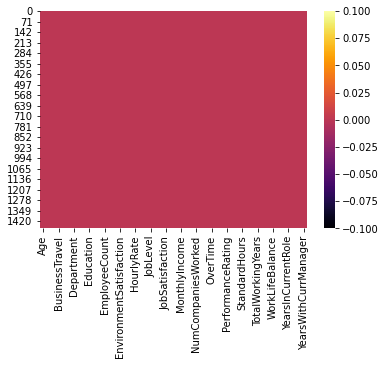

In [17]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(IBM.isnull(),cmap='inferno')

In [18]:
# Gender Distribution in the Dataset

IBM.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

**Observation :**

There are 882 no. of Males and 588 no. of Females in Dataset .

In [19]:
# MaritalStatus Distribution in our Dataset.

IBM.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [20]:
# Check for duplicate observations in the Dataset

IBM.duplicated().sum()

0

There is no duplicate value in the dataset.

**Drop Irrelevant Columns**

We will drop those columns that have singular value as those columns will not affect our Prediction . 

In [ ]:
# Inspect useless features using nunique

IBM.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [21]:
IBM.drop('Over18',axis=1,inplace=True)
IBM.drop('EmployeeCount',axis=1,inplace=True)
IBM.drop('StandardHours',axis=1,inplace=True)
IBM.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
#Inspect values of categorical attributes

for col in cols:
    display(IBM[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

# **EDA(Exploratory Data Analysis)**

**1.Univariant Analysis**

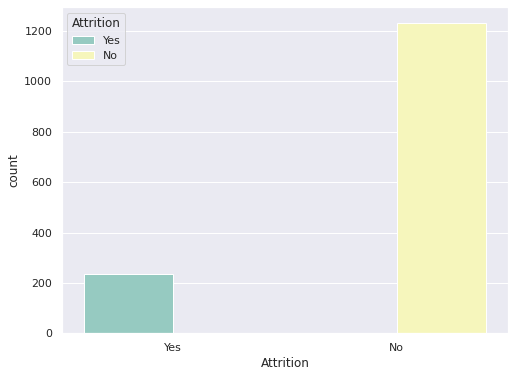

In [23]:
#Plotting Attrition Distribution in the Dataset

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition', data=IBM , hue="Attrition",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

1.Maximum no. of Persons are in the category of No Attrition .

2.Clearly a class imbalance problem exists .

In [24]:
# To plot pie-chart

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

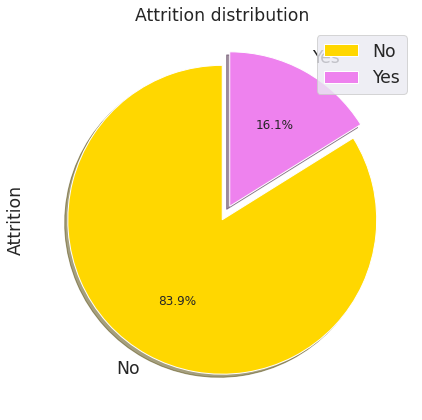

In [25]:
# Plotting 'Attrition' attribute in Pie-Chart

f, ax = plt.subplots(figsize=(8, 6))
order = list(IBM['Attrition'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['gold','violet']
explode = (0,0.1)
IBM['Attrition'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Attrition distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

**Observation :**

1.Maximum no. of Persons are in the category of No Attrition .

2.Clearly a class imbalance problem exists .

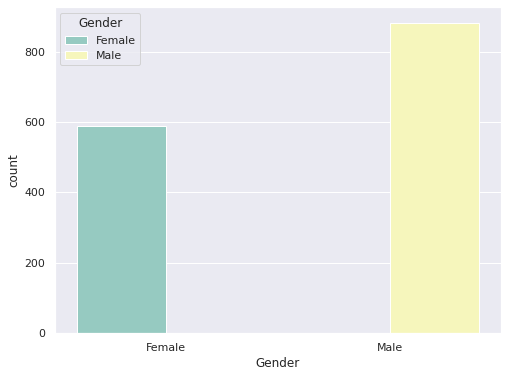

In [26]:
#Plotting Gender Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=IBM , hue="Gender",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

There are Males present in the Dataset .

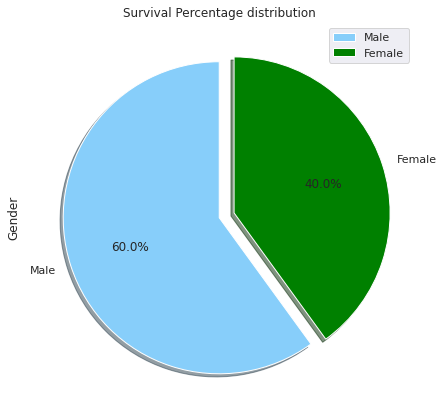

In [27]:
# Plotting 'Gender' attribute in Pie-Chart

f, ax = plt.subplots(figsize=(8, 6))
order = list(IBM['Gender'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue','green']
explode = (0,0.1)
IBM['Gender'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Survival Percentage distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

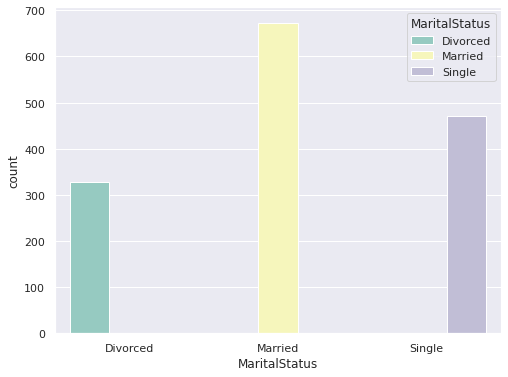

In [28]:
#Plotting MaritalStatus Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='MaritalStatus', data=IBM , hue="MaritalStatus",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

Most persons have been Married and Least number of persons have divorced.

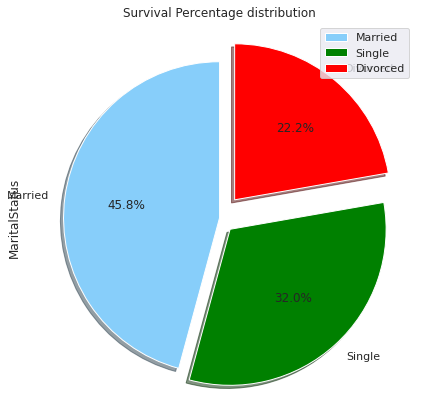

In [29]:
# Plotting 'MaritalStatus' attribute in Pie-Chart

f, ax = plt.subplots(figsize=(8, 6))
order = list(IBM['MaritalStatus'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue','green','red']
explode = (0,0.1,0.15)
IBM['MaritalStatus'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Survival Percentage distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

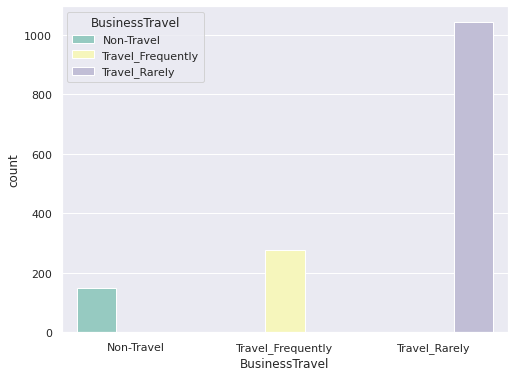

In [30]:
#Plotting BusinessTravel Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='BusinessTravel', data=IBM , hue="BusinessTravel",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

Most Perons Have Rarely travel status in Business Travels .

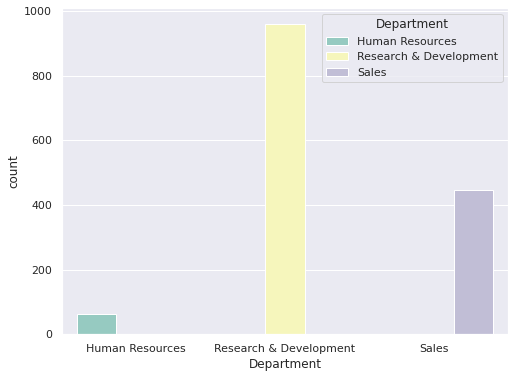

In [31]:
#Plotting Department Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='Department', data=IBM , hue="Department",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

Most of the Employees are of Research & Development Department .

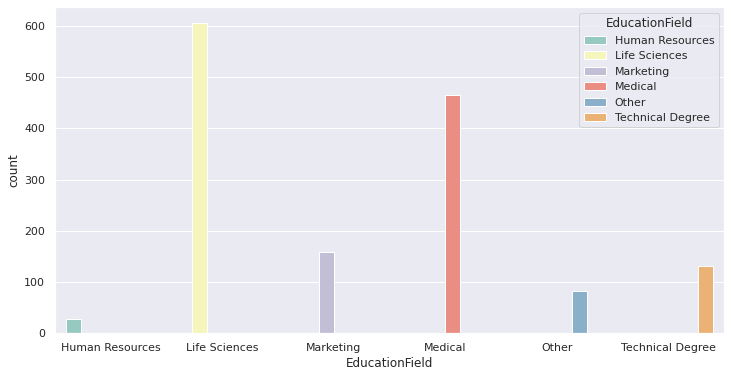

In [32]:
#Plotting EducationField Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x='EducationField', data=IBM , hue="EducationField",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

Most of the Employees have the educational background of Life Sciences .

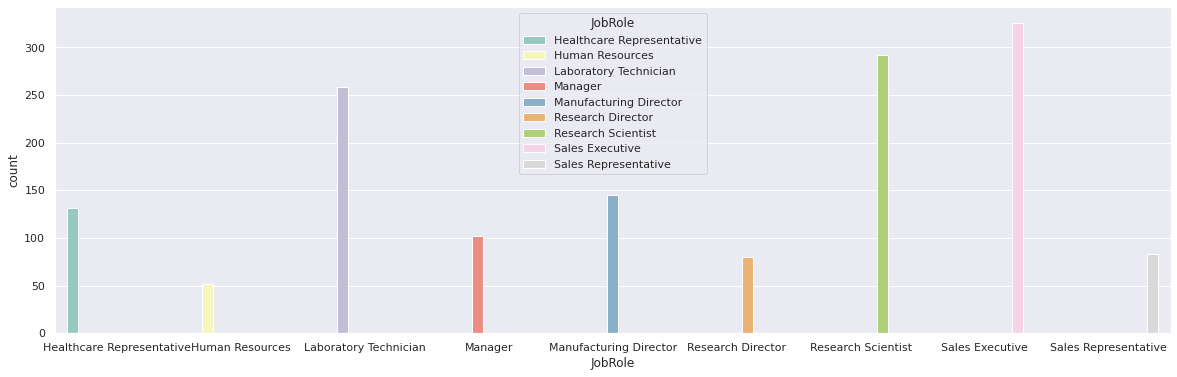

In [33]:
#Plotting JobRole Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,6))
sns.countplot(x='JobRole', data=IBM , hue="JobRole",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :** 

Most of the Employees have the Job role as Sales Executive .

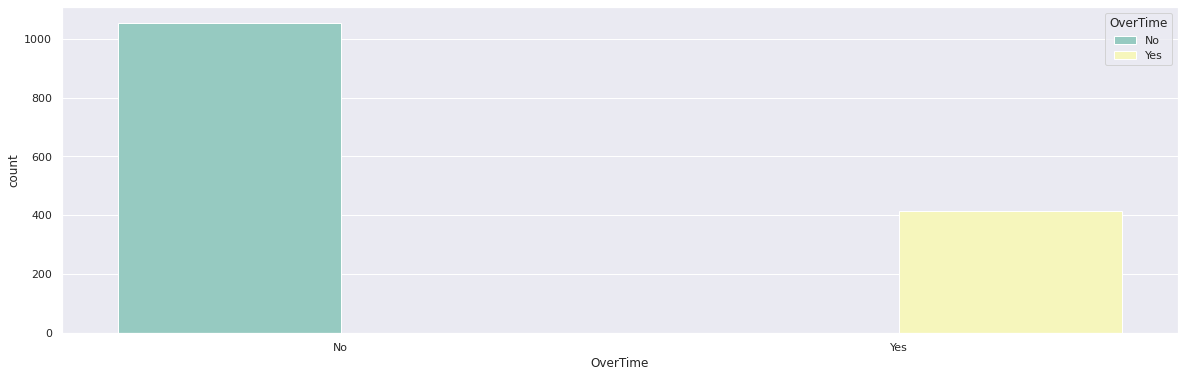

In [34]:
#Plotting OverTime Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,6))
sns.countplot(x='OverTime', data=IBM , hue="OverTime",saturation=0.75 ,palette="Set3" )
plt.show()

**Observation :**

Most of the EMployees have no over time in working Hours .

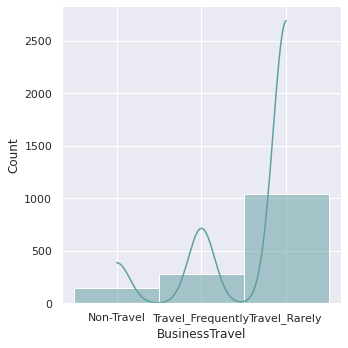

In [35]:
#PLot BusinessTravel Distribution

sns.displot(x = 'BusinessTravel', data = IBM, color = 'cadetblue', kde = True);

<Figure size 864x360 with 0 Axes>

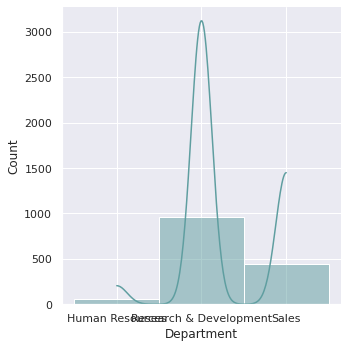

In [36]:
#PLot Department Distribution

plt.figure(figsize=(12,5))
sns.displot(x = 'Department', data = IBM, color = 'cadetblue', kde = True);
plt.show()

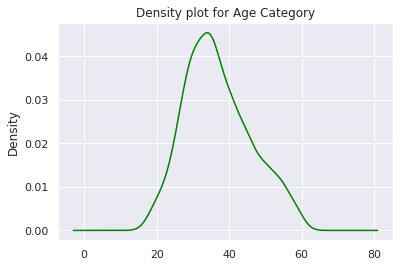

In [37]:
# plotting the density plot 
# for 'Age' attribute
# using plot.density()
IBM.Age.plot.density(color='green')
plt.title('Density plot for Age Category')
plt.show()

**Now we will plot CountPlot for all Numerical Values by defining a loop**

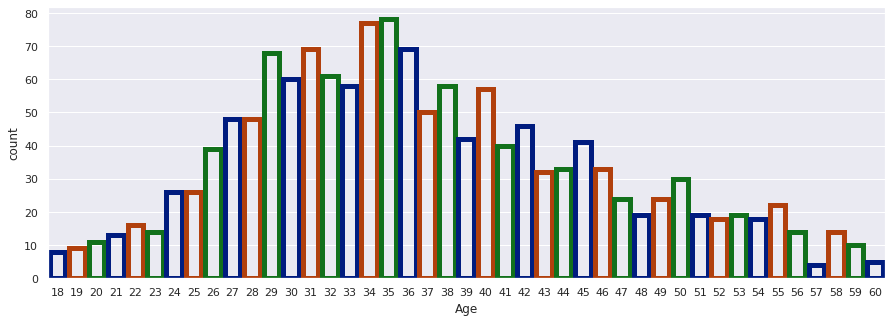

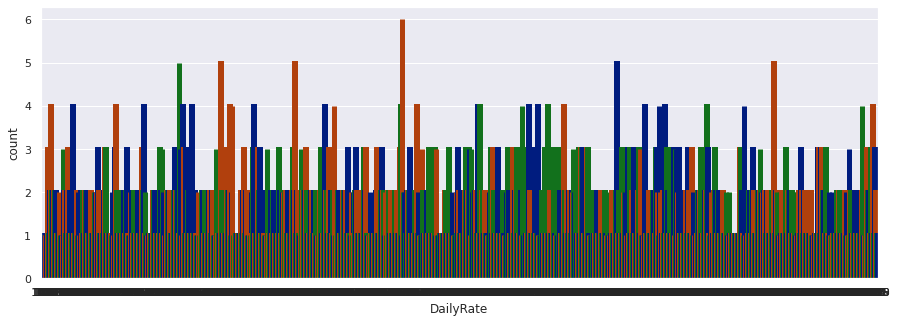

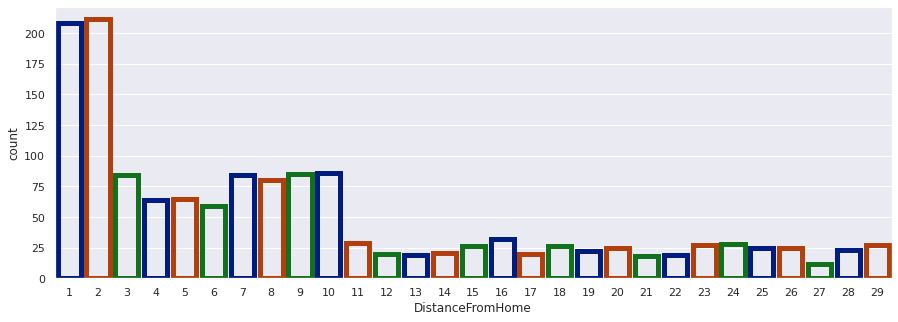

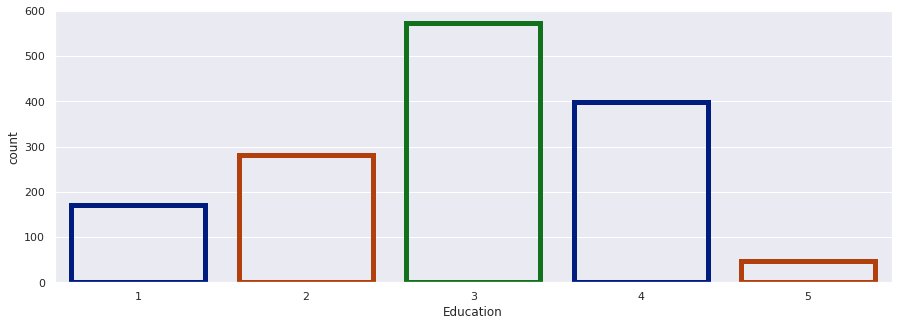

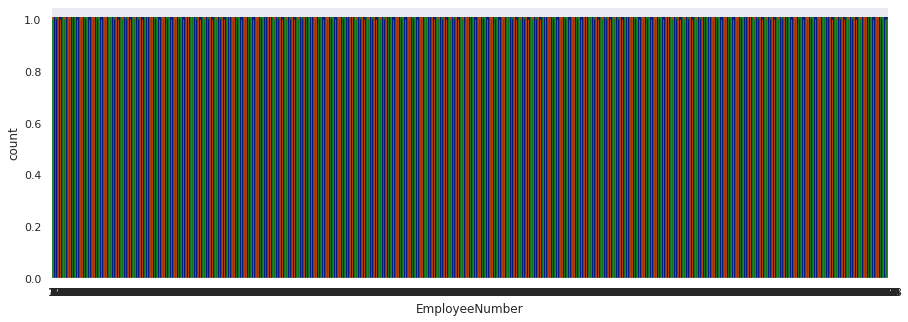

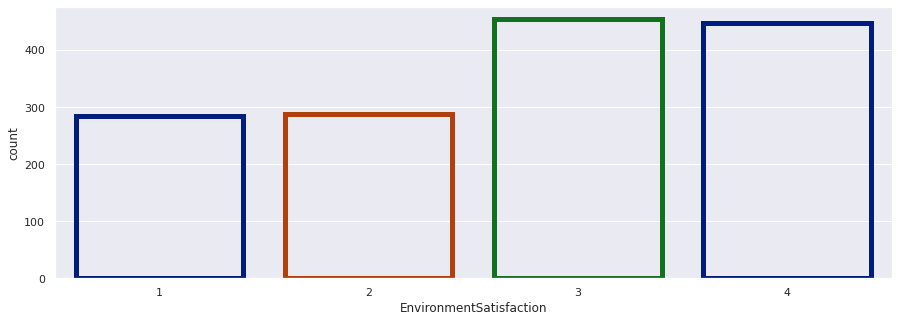

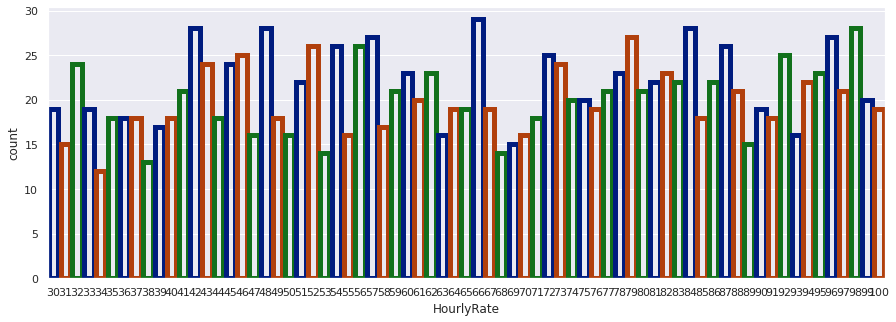

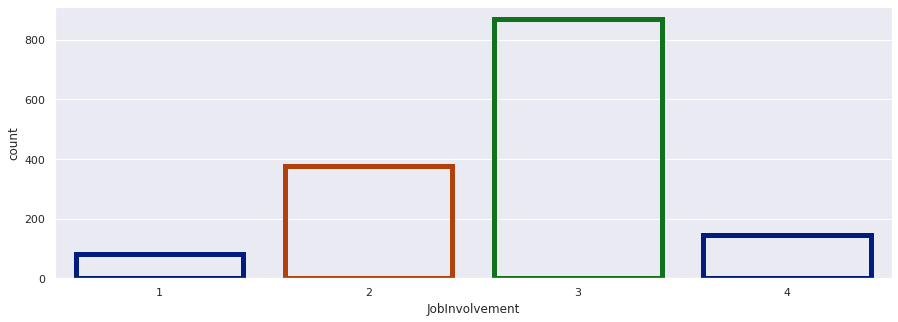

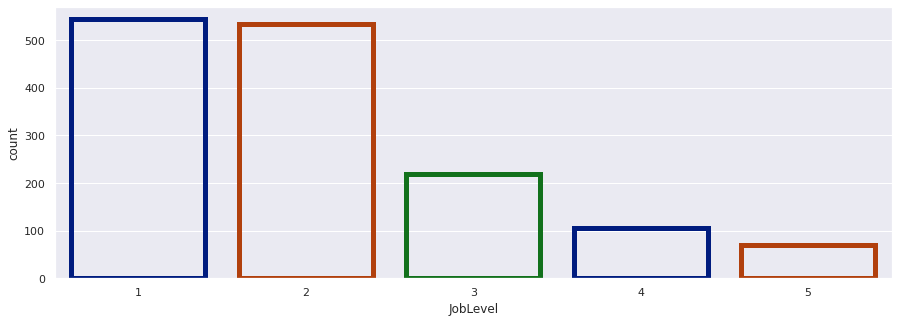

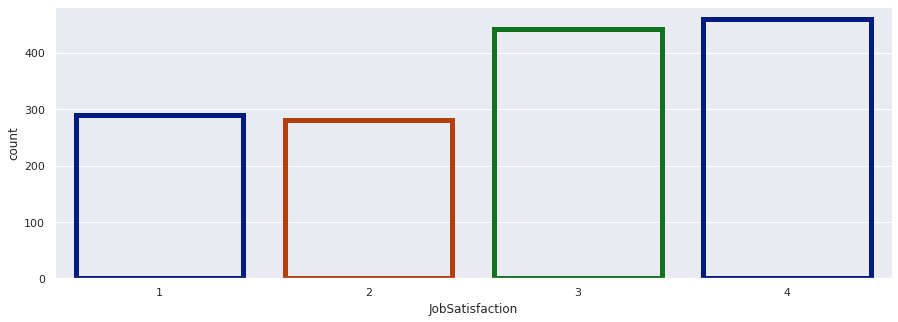

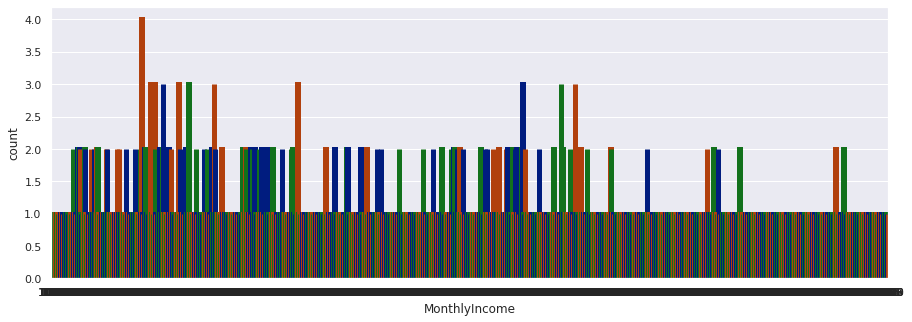

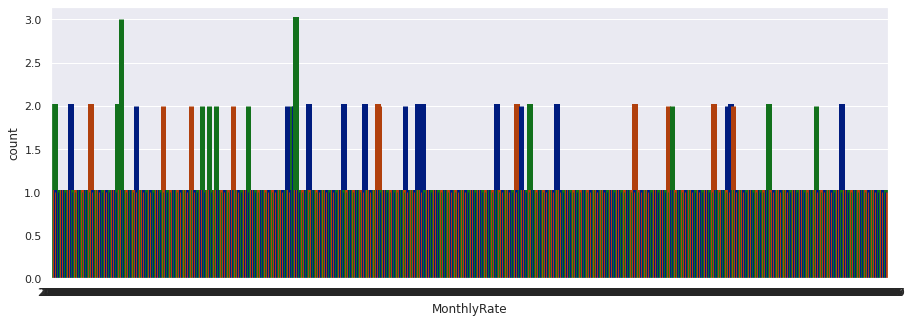

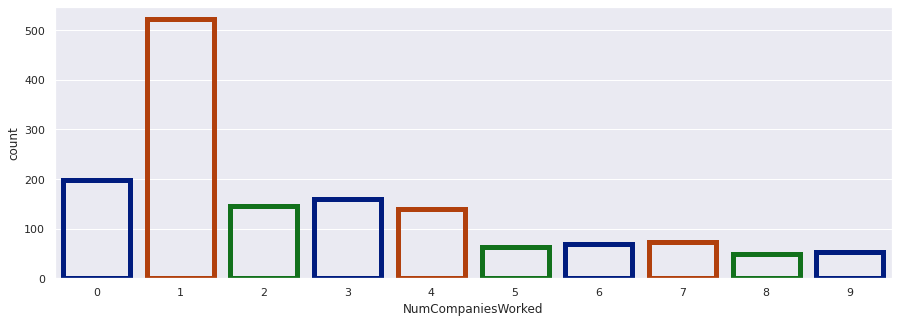

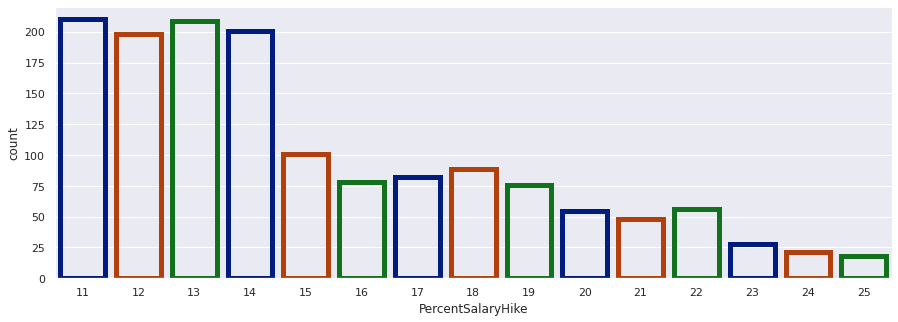

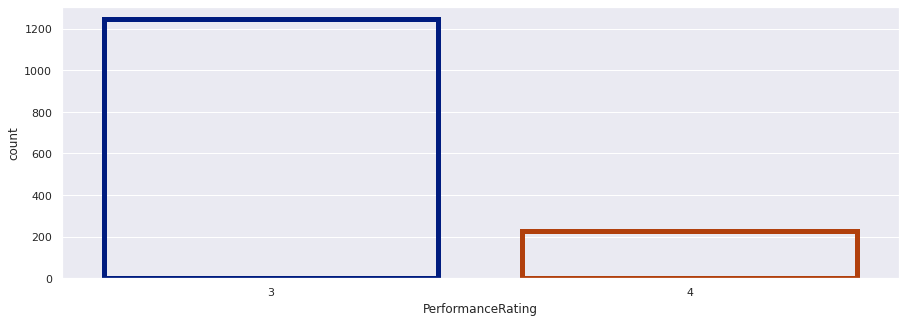

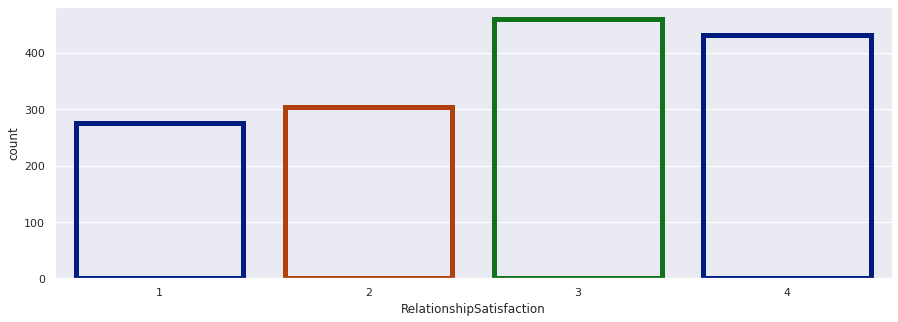

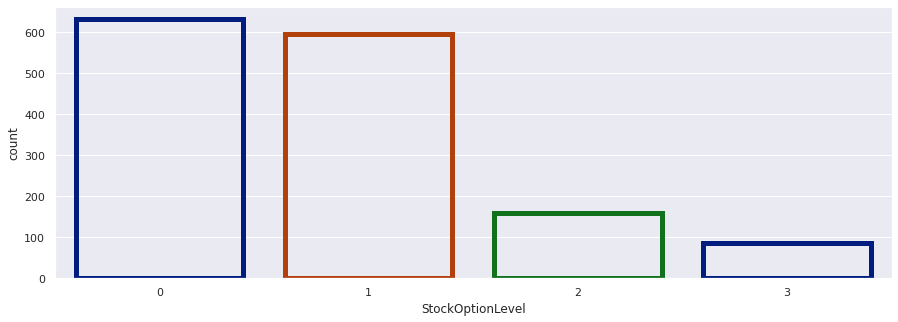

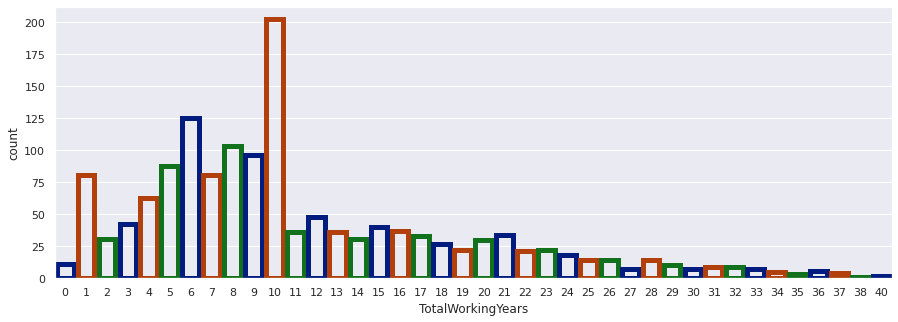

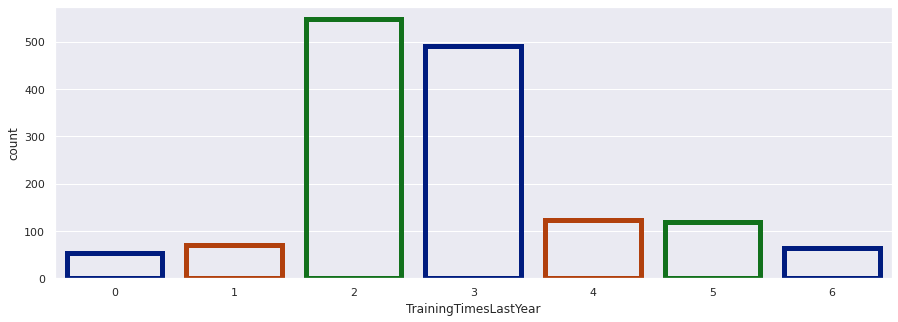

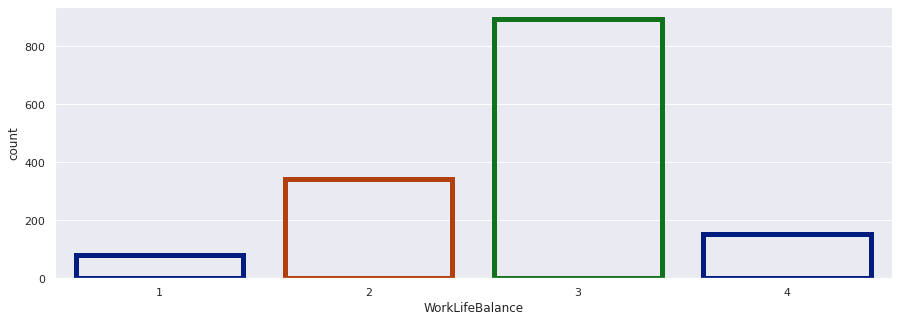

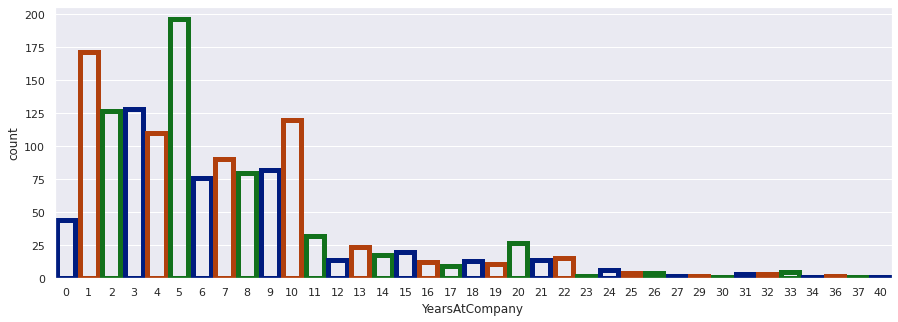

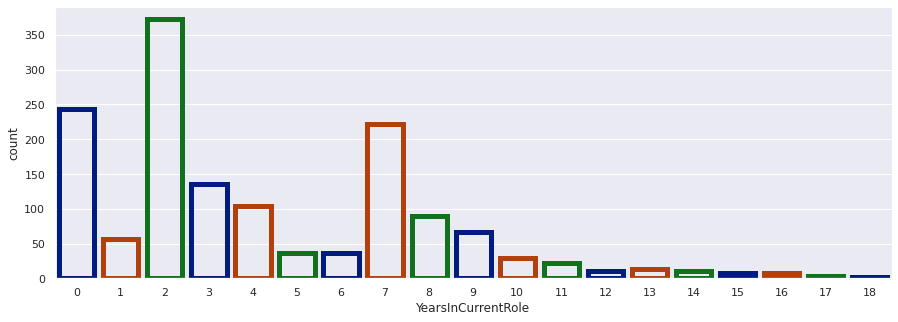

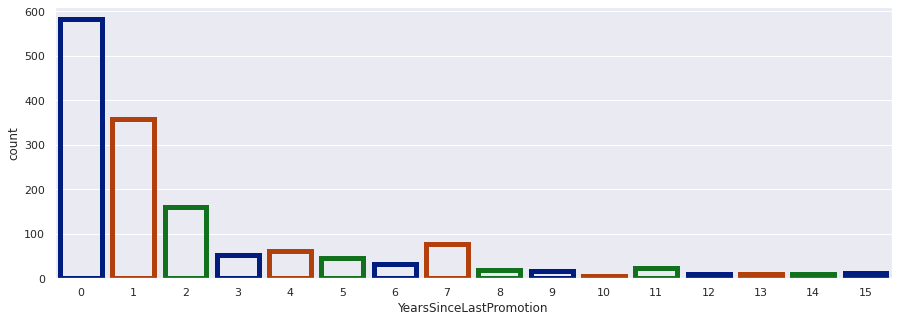

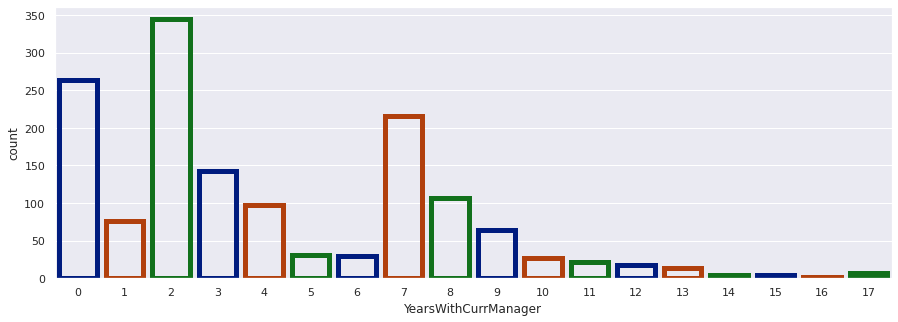

In [39]:
#Countplot to see all unique values in Numerical Columns 

sns.set_theme(style="darkgrid")
for g in IBM.describe().columns:
    plt.figure(figsize=(15,5))
    sns.countplot(IBM[g] , color = 'm' , facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
    plt.show()

**Now we will plot Distplot for all attributes in the Dataset .**

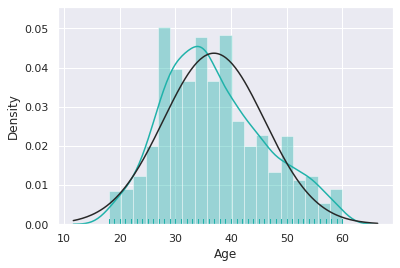

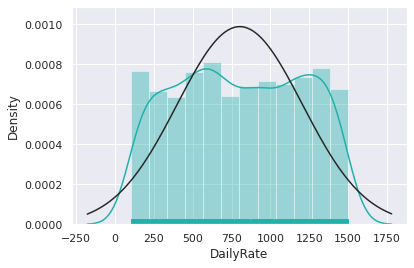

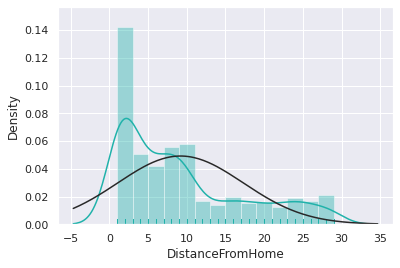

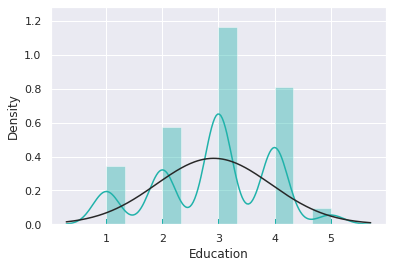

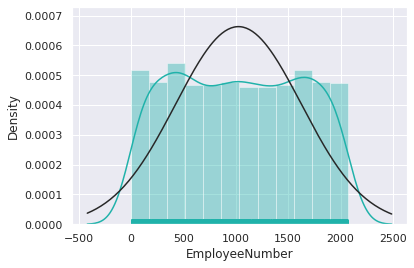

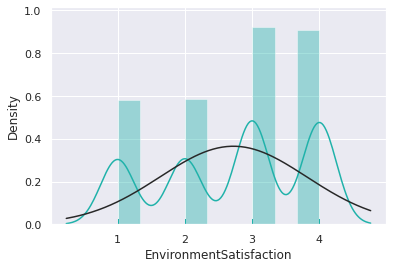

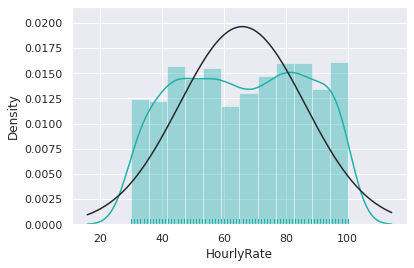

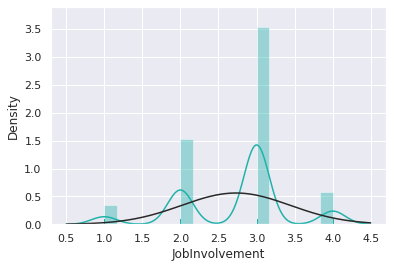

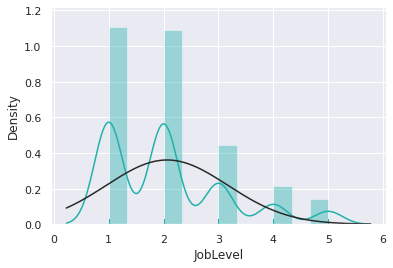

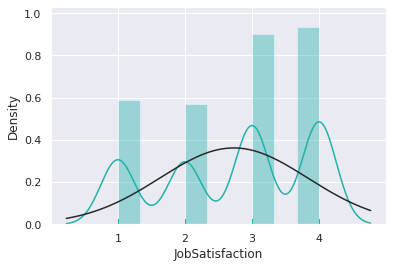

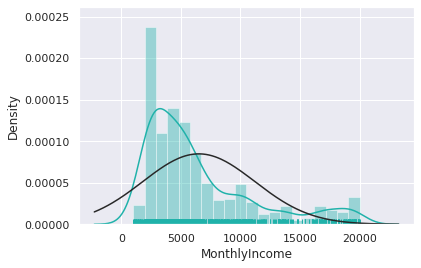

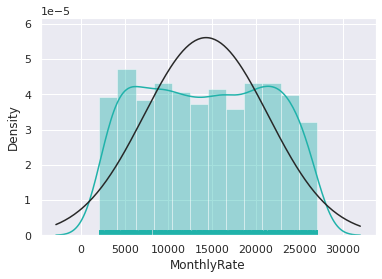

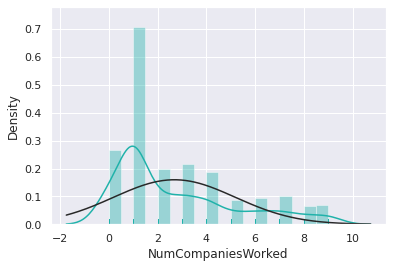

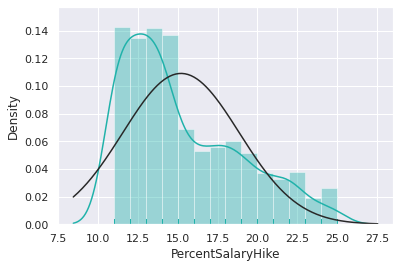

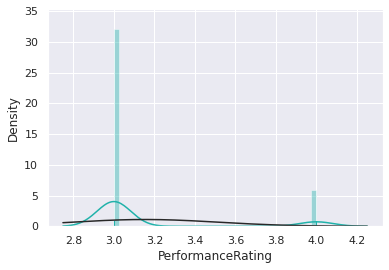

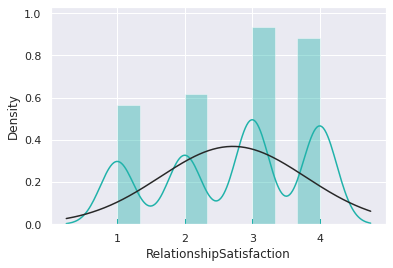

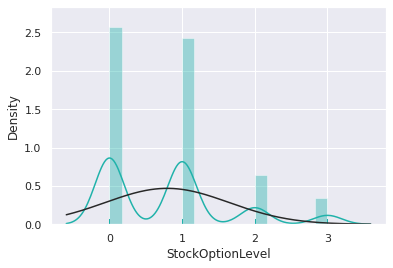

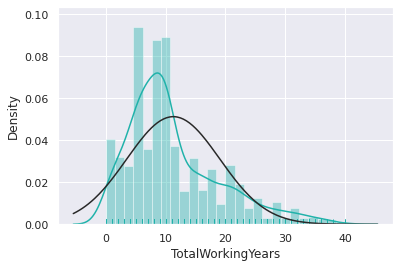

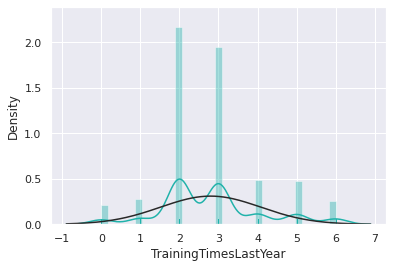

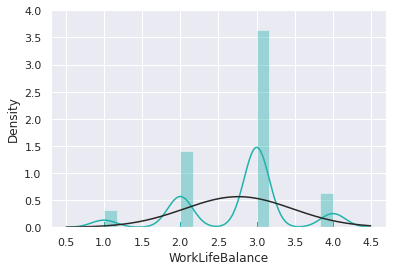

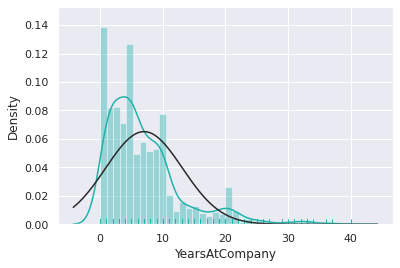

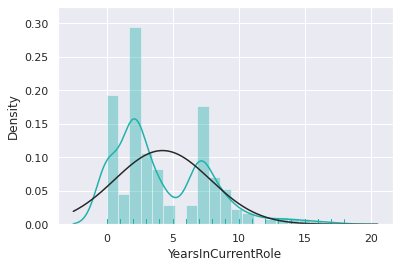

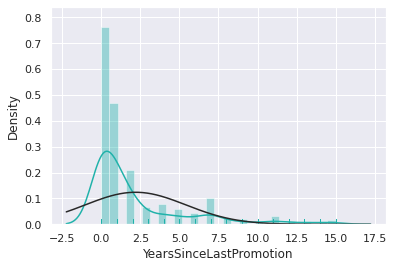

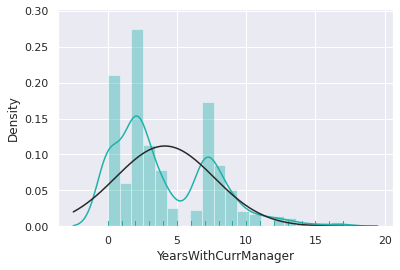

In [41]:
#Distplot to see skewness in different Columns 

from scipy.stats import norm
for g in IBM.describe().columns:
    sns.distplot(IBM[g] , rug=True , color = 'lightseagreen' , fit=norm)
    plt.show()

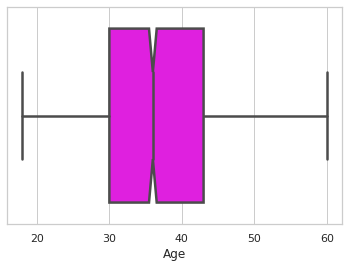

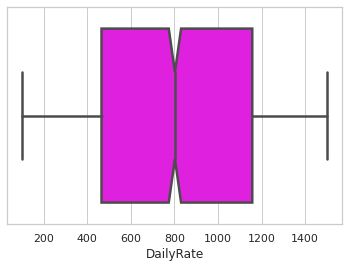

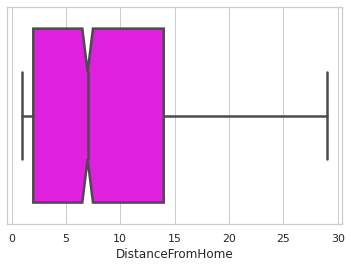

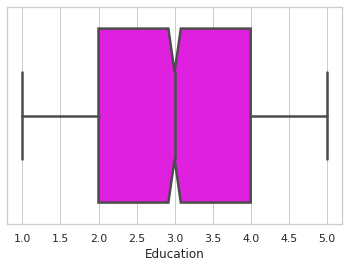

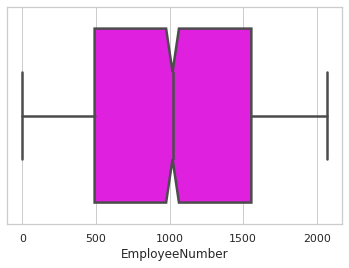

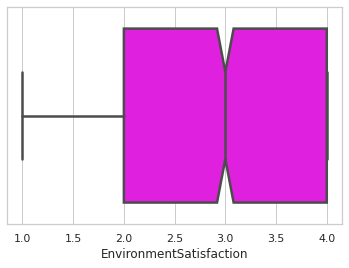

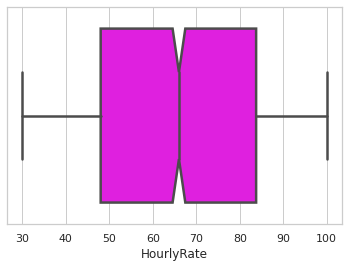

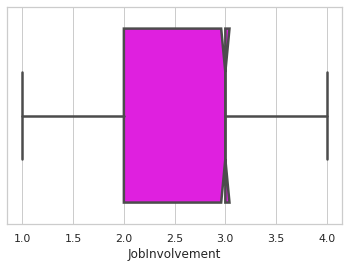

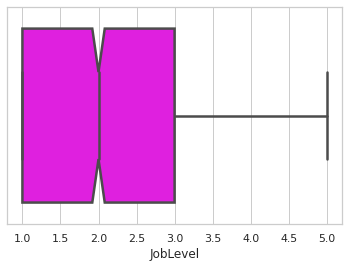

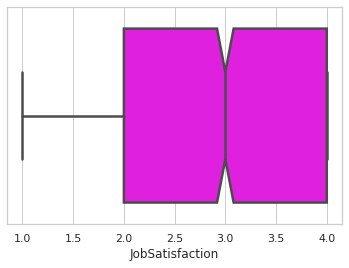

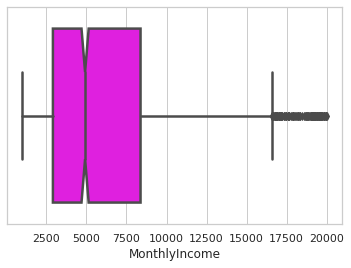

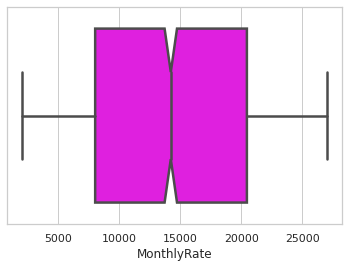

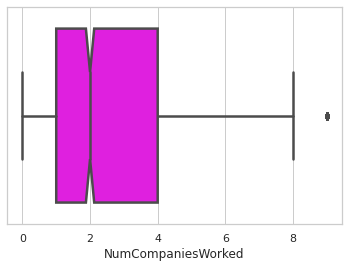

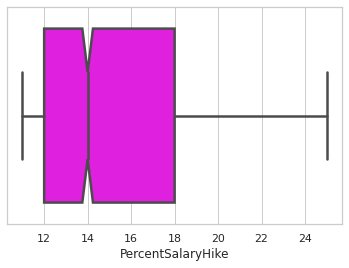

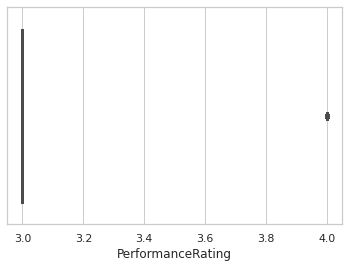

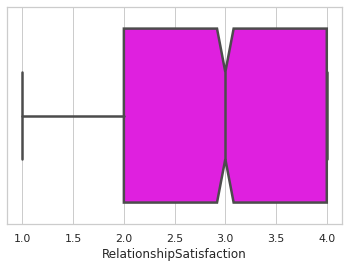

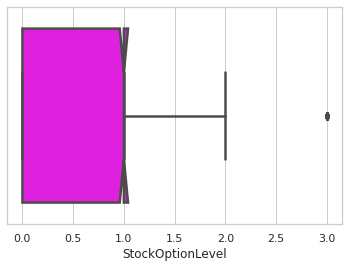

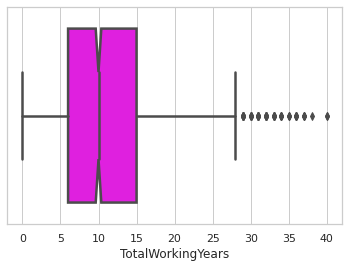

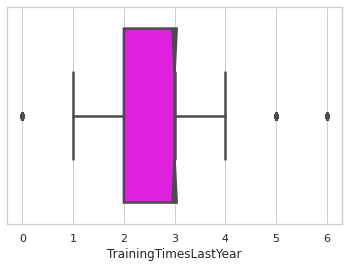

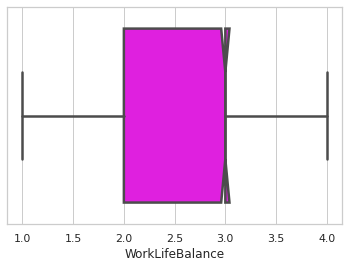

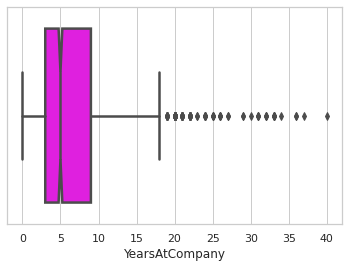

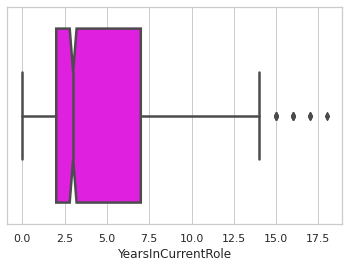

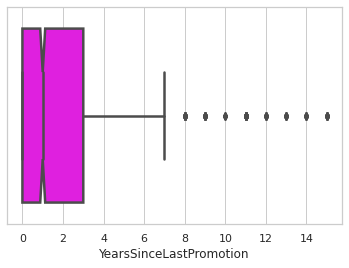

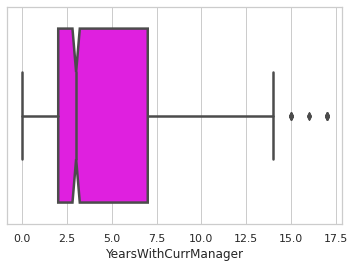

In [42]:
#Boxplot to see outliers in different Columns 

sns.set_theme(style="whitegrid")
for g in IBM.describe().columns:
    sns.boxplot(IBM[g] , color = 'magenta' , notch ='True',linewidth=2.5)
    plt.show()

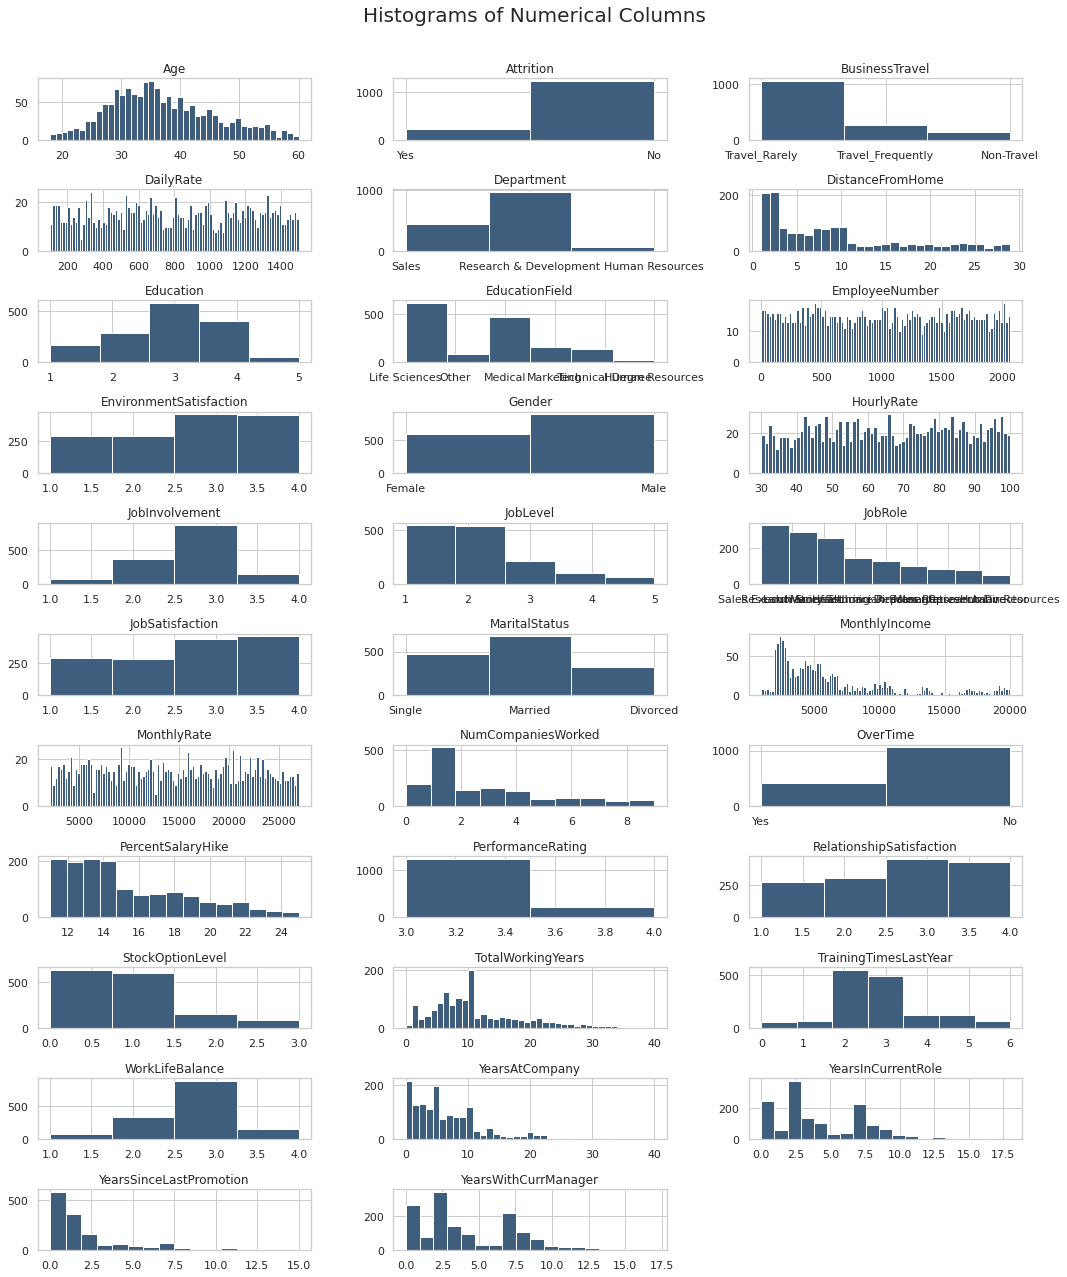

In [43]:
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(IBM.shape[1]):
    plt.subplot(12, 3, i + 1)
    f = plt.gca()
    f.set_title(IBM.columns.values[i])

    vals = np.size(IBM.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(IBM.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**2.Bivariant Analysis**

**Performing Label Encoder for Categorical Values**

In [44]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
IBM['Attrition']=LE.fit_transform(IBM['Attrition'])
IBM['BusinessTravel']=LE.fit_transform(IBM['BusinessTravel'])
IBM['Department']=LE.fit_transform(IBM['Department'])
IBM['Education']=LE.fit_transform(IBM['Education'])
IBM['Gender']=LE.fit_transform(IBM['Gender'])
IBM['JobRole']=LE.fit_transform(IBM['JobRole'])
IBM['MaritalStatus']=LE.fit_transform(IBM['MaritalStatus'])
IBM['OverTime']=LE.fit_transform(IBM['OverTime'])
IBM['EducationField']=LE.fit_transform(IBM['EducationField'])

In [45]:
IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,0,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,1,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,3,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,0,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


**Observation :** Now we have all numerical Values .

In [46]:
IBM['Attrition'].unique()

array([1, 0])

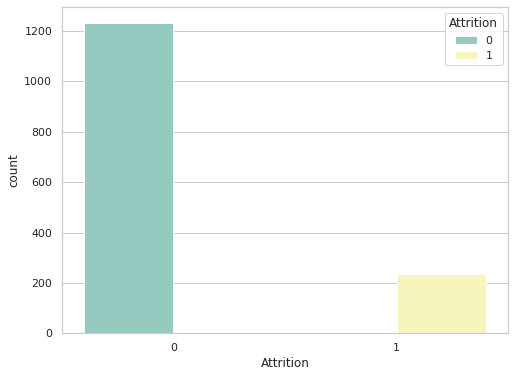

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition', data=IBM , hue="Attrition",saturation=0.75 ,palette="Set3" )
plt.show()

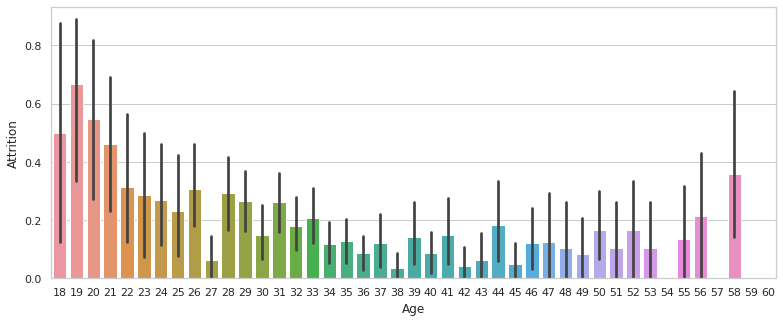

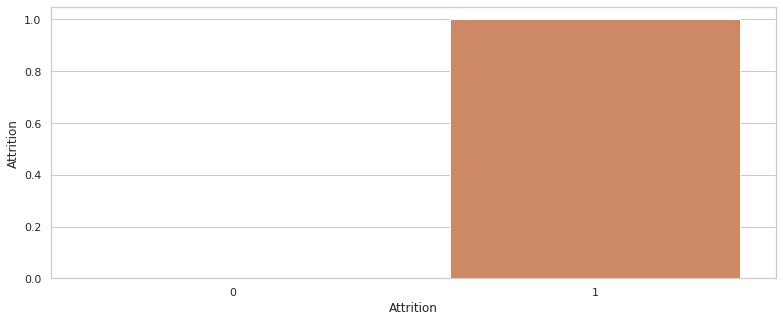

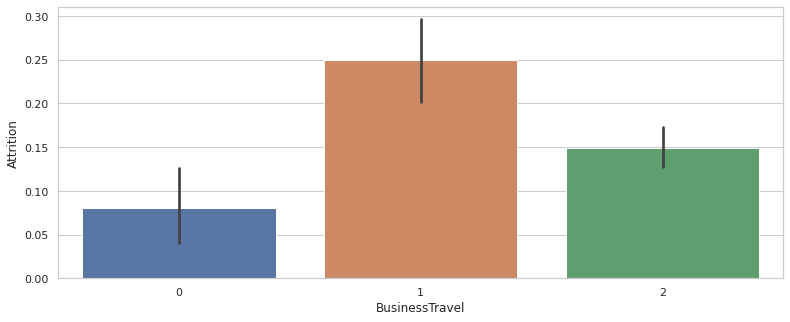

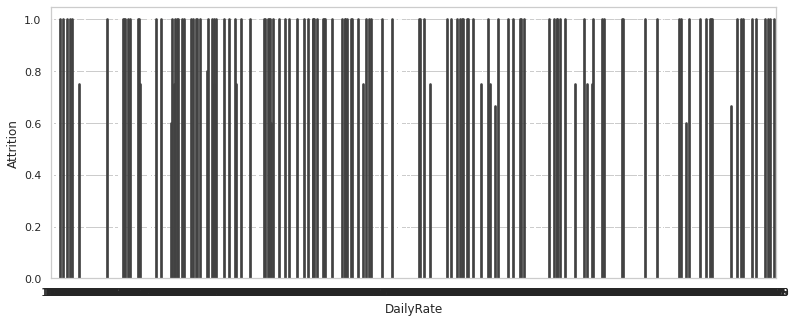

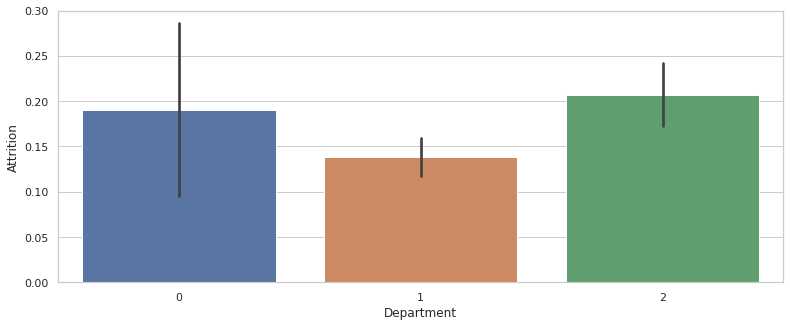

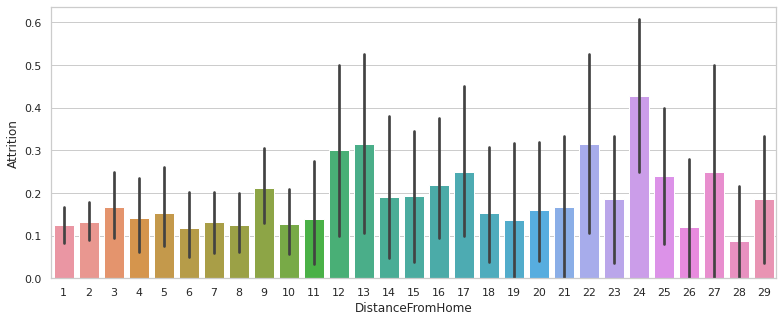

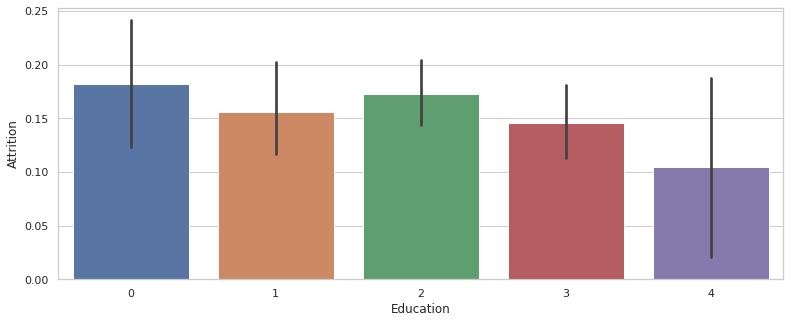

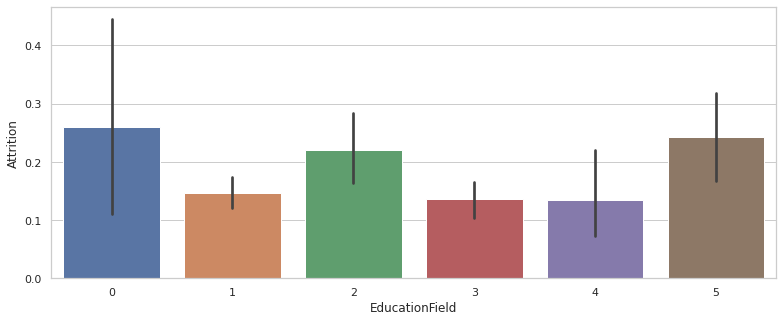

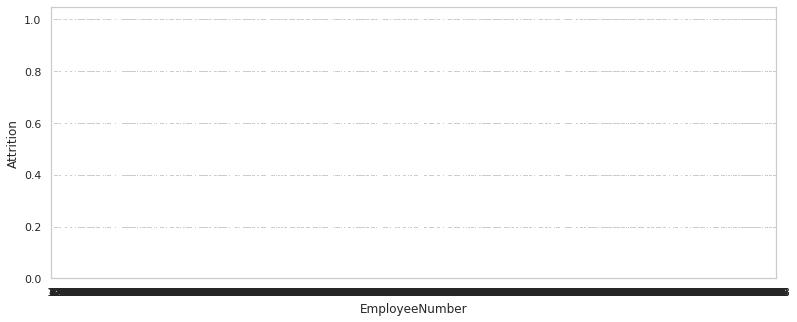

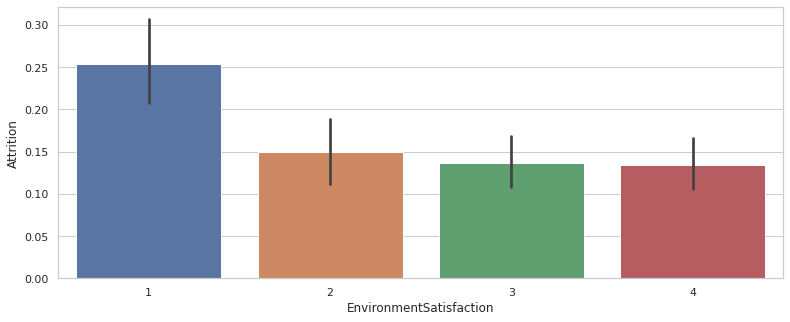

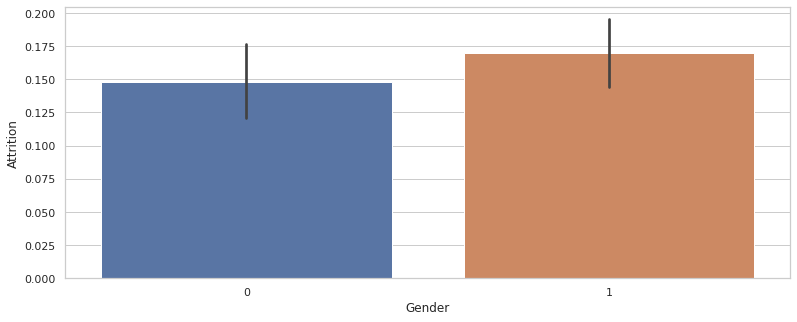

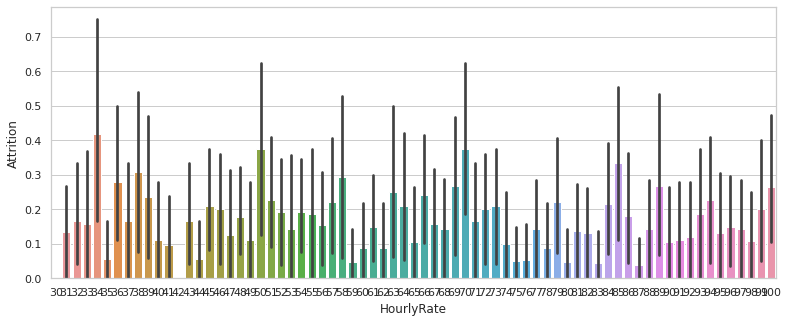

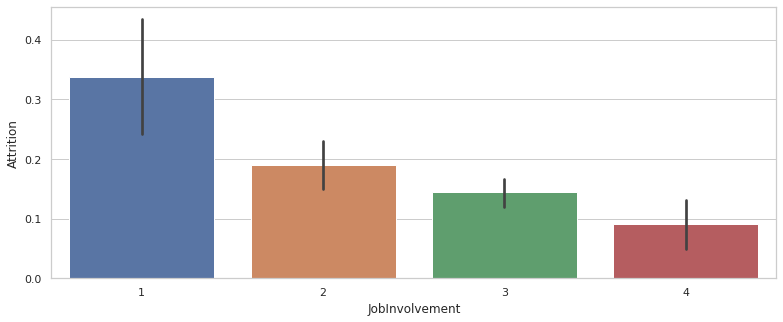

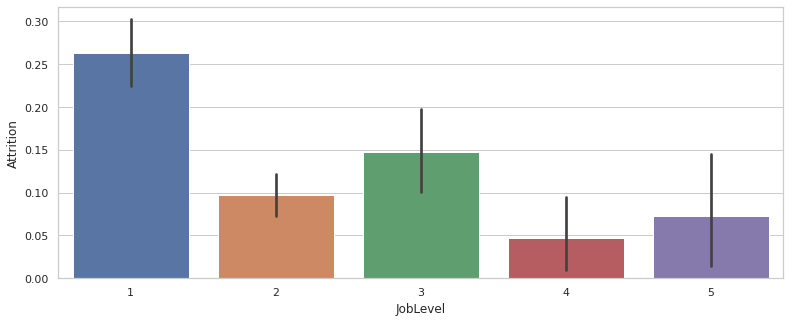

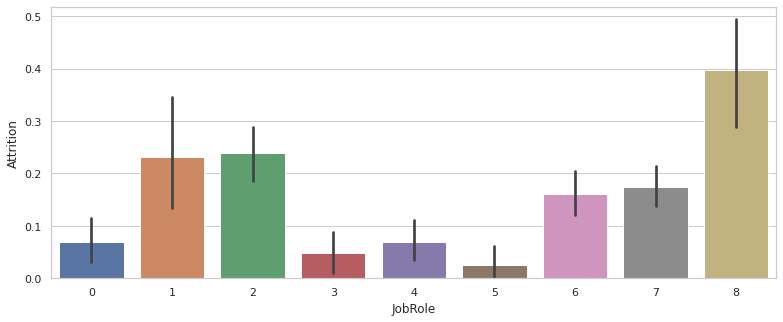

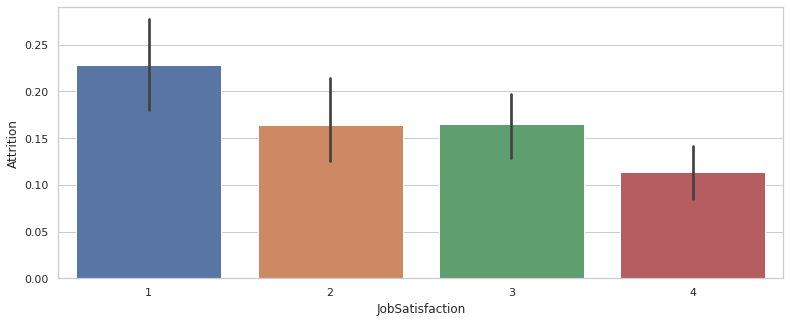

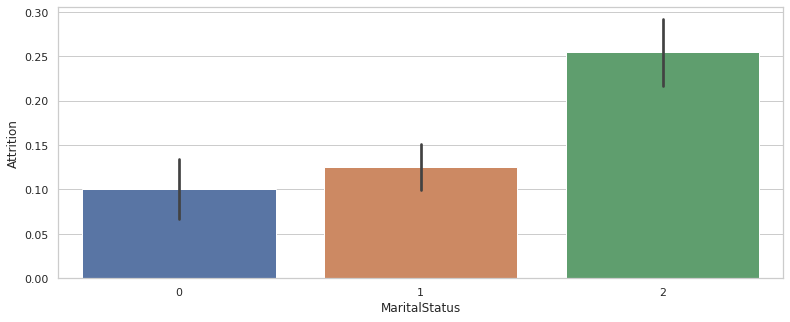

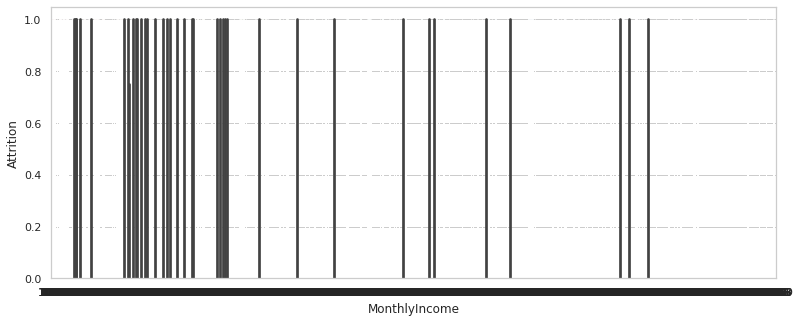

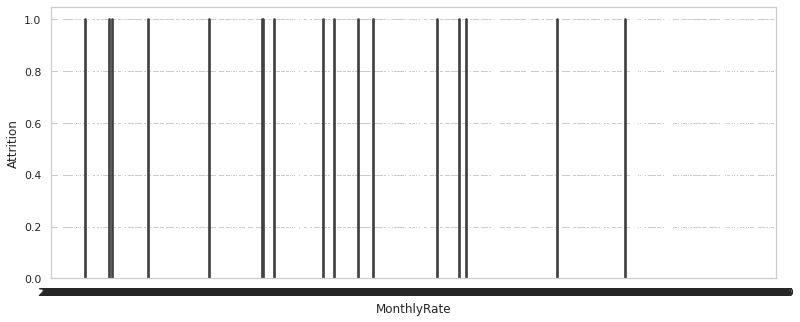

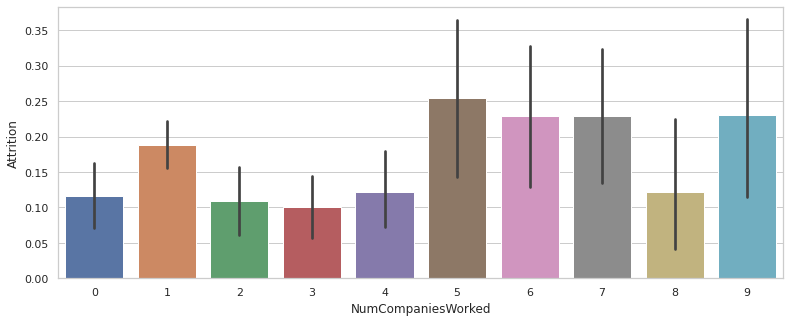

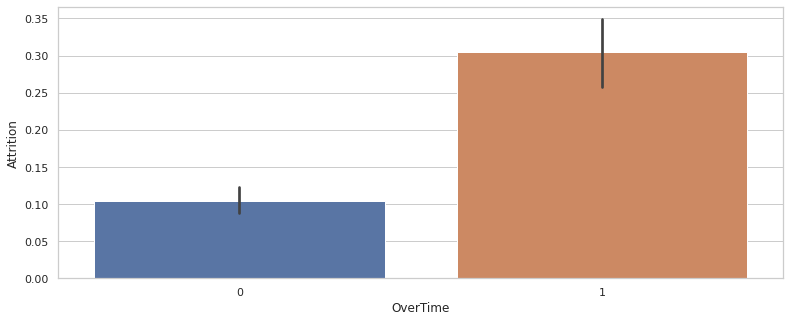

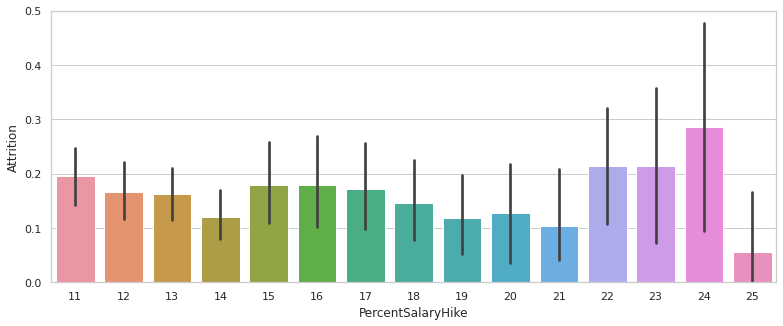

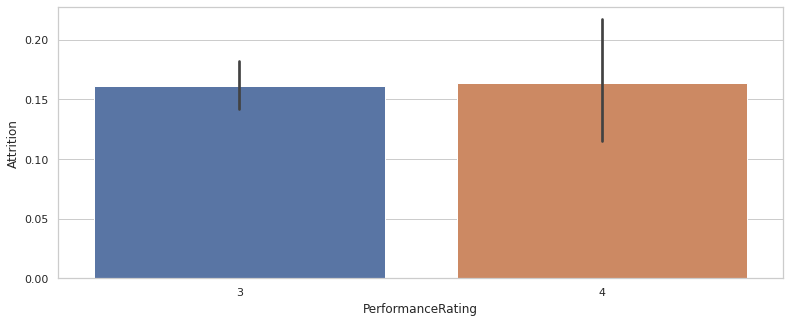

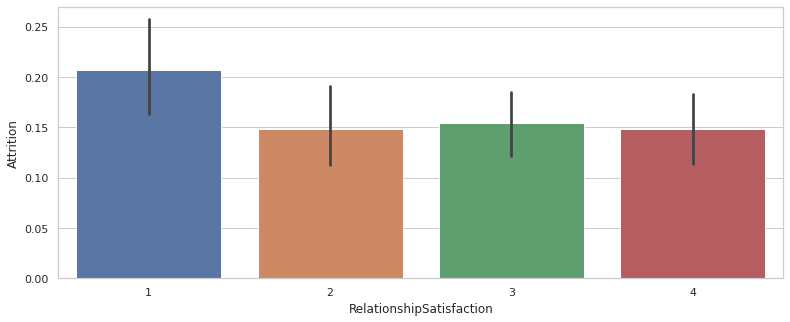

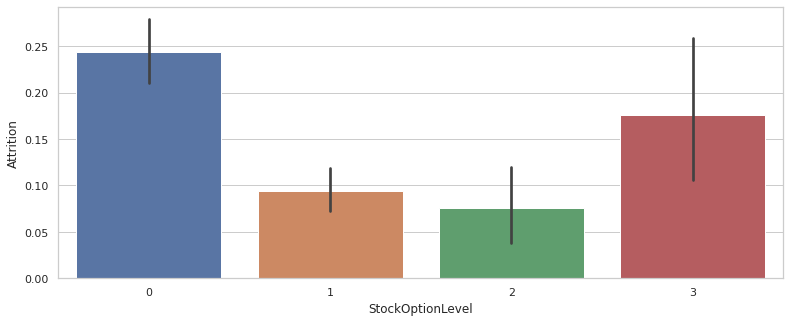

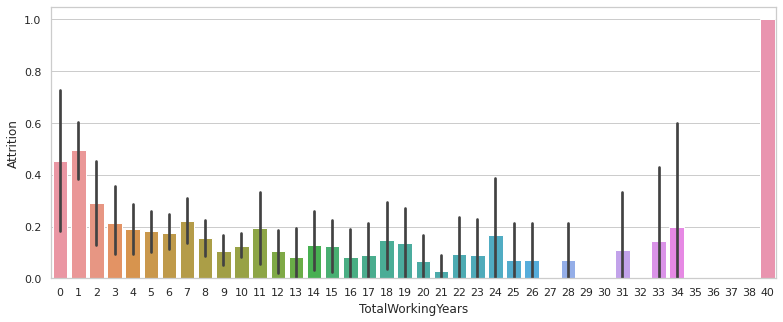

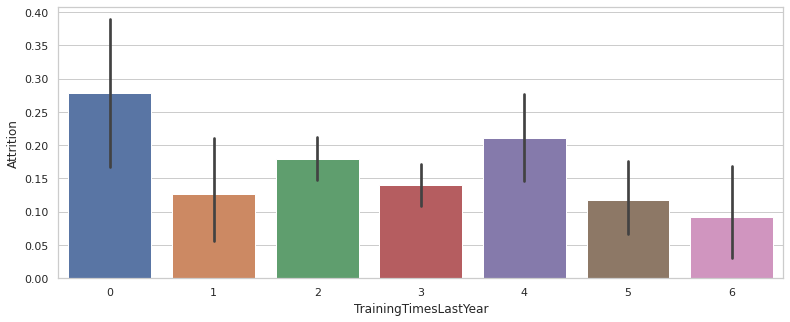

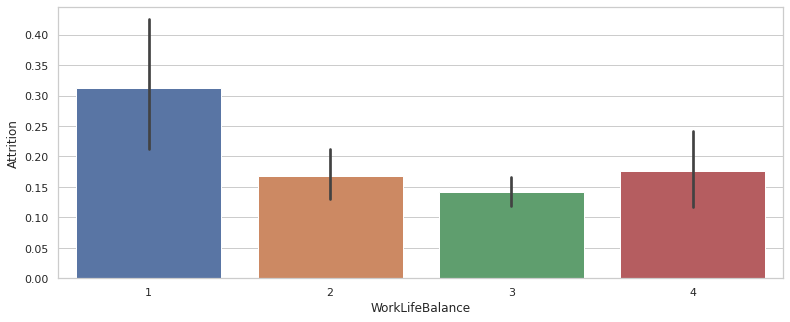

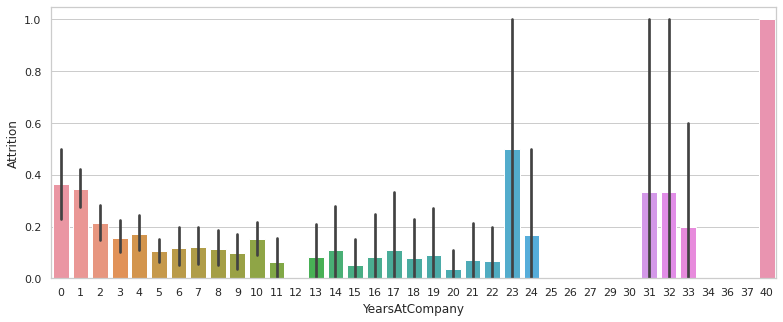

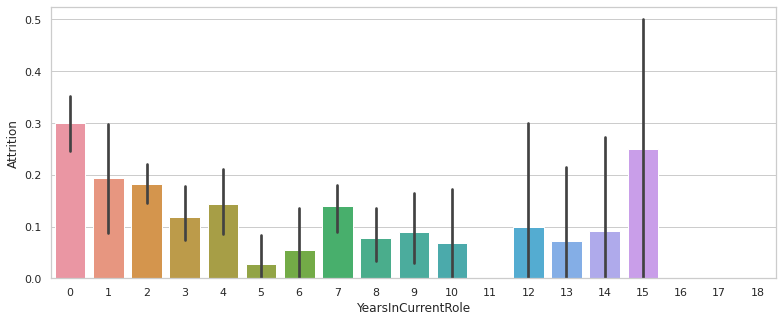

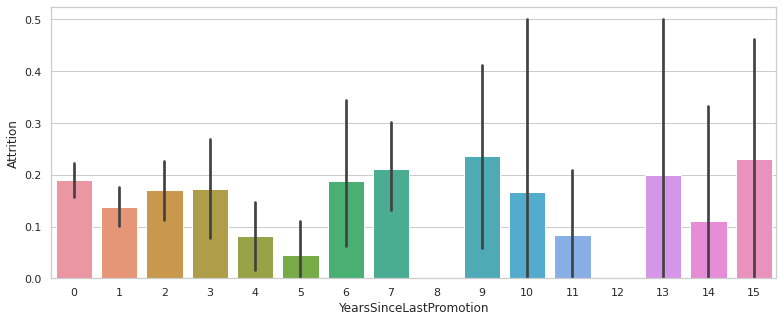

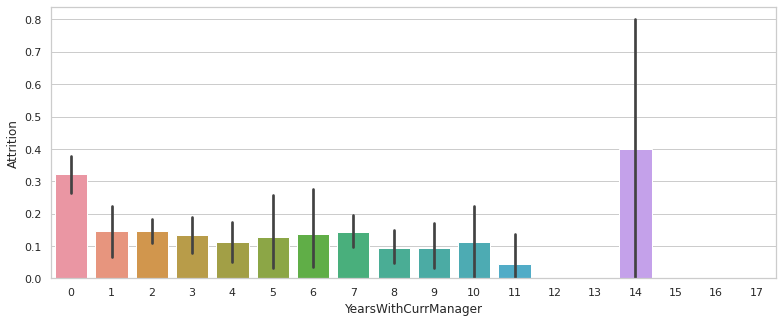

In [50]:
#Checking relation between feature and target variablei.e Attrition 

for i in IBM.columns:
    plt.figure(figsize=(13,5))
    sns.barplot(x=IBM[i],y=IBM.Attrition,label = IBM)

In [51]:
#let's check out AgeGroup w.r.t Attrition

pd.crosstab(IBM.Age, IBM.Attrition)

Attrition,0,1
Age,,
18,4,4
19,3,6
20,5,6
21,7,6
22,11,5
23,10,4
24,19,7
25,20,6
26,27,12


<Figure size 1080x432 with 0 Axes>

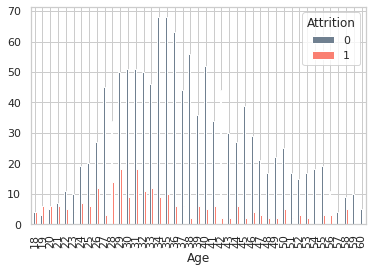

In [52]:
#Plot 
plt.figure(figsize=(15,6))
pd.crosstab(IBM.Age, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);
plt.show()

**Observation :**

In 18-21 age group, young employees are more likely to leave the company. Their attrition proportion to their age group is approximately 53.7% (22 out of 41) and that makes up 9% of all attrition (22 out of 237).

If we evaluate overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition(116 out 606). That makes up approximately 49% of all attrition in the company (116 out of 237).

35-60 age group generally prefers to secure their job in the same company.

In [53]:
#let's check out BusinessTravel w.r.t Attrition

pd.crosstab(IBM.BusinessTravel, IBM.Attrition)

Attrition,0,1
BusinessTravel,,
0,138,12
1,208,69
2,887,156


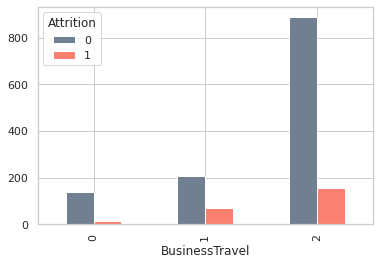

In [54]:
#Plot 

pd.crosstab(IBM.BusinessTravel, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

In the company, most of the employee travel rarely or don't travel according to their job description. That group compose the 81.1% of entire company(1193). The rest of the company employees which is 19.9% of them has to travel frequently (277 out of 1470).

The highest attrition number with 156 belongs to the employees who travels rarely. That is approximately 15% of employees in that group (156 out of 1043). But when you put this number overall attrition, it makes up 65.8% of all attrition in the company(156 out of 237).

if we look at the attrition percentage of relevant travel group, the employees who are traveling frequently are in the danger zone. Because they have the highest attrition proportion, which is 24.9%, in their individual travel group(69 out of 277). That group's attrition rate composes of the 29.1% of overall attrition in the company (69 out of 237).

Employees who don't travel in their current role have the lowest attrition rate, which is 8%.

In [55]:
#let's check out Department w.r.t Attrition

pd.crosstab(IBM.Department, IBM.Attrition)

Attrition,0,1
Department,,
0,51,12
1,828,133
2,354,92


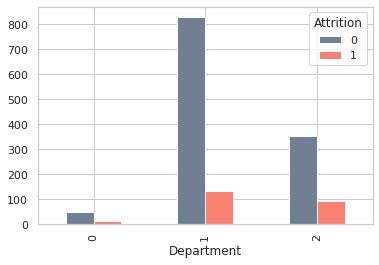

In [56]:
#Plot 

pd.crosstab(IBM.Department, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

There are three departments in the company. Research & Development Department has the most attrition number in the company. 13.8% of Research & Development Department employee left the organization. In numbers, it is equal to 133, which makes us the 56.1% of all attrition in the company. Actually, that attrition is a big number for company, but compared with other departments, Research & Development Department has the lowest attrition rate in itself as an individual department.

Sales Department has mostly been affected by the attrition. Because 20.6% of its employees left the organization. This is the highest number compared to the other two departments. That attrition makes up 38.8% of the attrition in the company (92 out of 237).

Human Resources Department follows the Sales Department in terms of being affected by attrition itself. 19% of that department employee left the company. But this is not that huge number in terms of whole attrition in company. Human Resources Department employee attrition makes up 5% of all attrition in the company (12 out of 237).

In [57]:
#let's check out EducationField w.r.t Attrition

pd.crosstab(IBM.EducationField, IBM.Attrition)

Attrition,0,1
EducationField,,
0,20,7
1,517,89
2,124,35
3,401,63
4,71,11
5,100,32


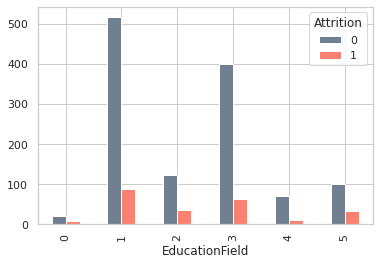

In [58]:
#Plot 

pd.crosstab(IBM.EducationField, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

Employees who have Life Science education level have the most attrition number which makes up the 37.5% of all attrition (89 out of 237). But that composes only 14.7% of attrition within Life Sciences field.

Medical education level have the second highest attrition number which makes up the 13.57% of all attrition (63 out of 237). But that composes only 14.7% of attrition within Life Sciences field.

Besides that, Human Resources, Technical Degree, and Marketing fields are mostly affected by the attrition respectively. Their approximately 22-26% employees left the company.

In [59]:
#let's check out Gender w.r.t Attrition

pd.crosstab(IBM.Gender, IBM.Attrition)

Attrition,0,1
Gender,,
0,501,87
1,732,150


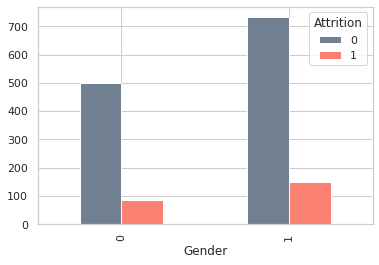

In [60]:
#Plot 

pd.crosstab(IBM.Gender, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

Male employees are more likely to leave the company than female employees.

In [61]:
#let's check out JobRole w.r.t Attrition

pd.crosstab(IBM.JobRole, IBM.Attrition)

Attrition,0,1
JobRole,,
0,122,9
1,40,12
2,197,62
3,97,5
4,135,10
5,78,2
6,245,47
7,269,57
8,50,33


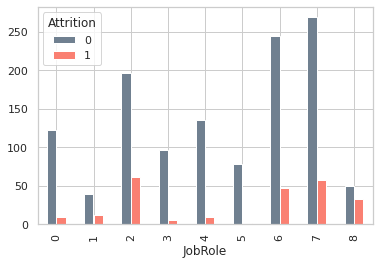

In [62]:
#Plot 

pd.crosstab(IBM.JobRole, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

Laboratory Technician has the most attrition number with the 26.2% of all attrition in the company (62 out of 237 employees). Sales Executive and Research Scientist are following the Laboratory Technician in attrition throughout the company with the 57 and 47 employees respectively. Those both job roles' attrition composes 44% of whole company's attrition.

Sales Representative role has been affected mostly by the attrition. Sales Representative has lost approximately 40% of its' employee. Laboratory Technician and Human Resources followed it in terms of losing employee as a job role.

On the other hand, Research Director job role has the lowest attrition number not only in the company (2.5%) but only within its own job role(0.8%).

In [63]:
#let's check out MaritalStatus w.r.t Attrition

pd.crosstab(IBM.MaritalStatus, IBM.Attrition)

Attrition,0,1
MaritalStatus,,
0,294,33
1,589,84
2,350,120


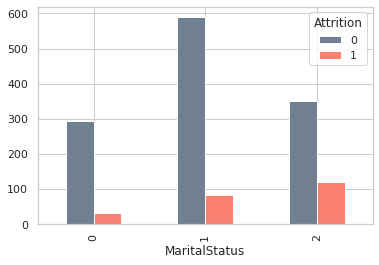

In [64]:
#Plot 

pd.crosstab(IBM.MaritalStatus, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

Single employees are more likely to leave the company. They have the highest attrition number and compose of the 50.6% employees who left the company. Married and Divorced employees are the followers of Single employees in the attrition number of the company respectively.

In [66]:
#let's check out OverTime w.r.t Attrition

pd.crosstab(IBM.OverTime, IBM.Attrition)

Attrition,0,1
OverTime,,
0,944,110
1,289,127


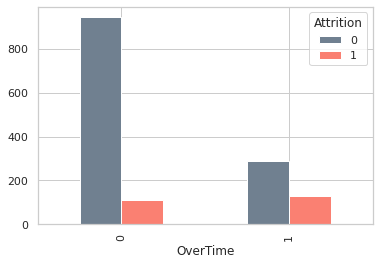

In [67]:
#Plot 

pd.crosstab(IBM.OverTime, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

28.3% of employees have the over time work in the company and they have higher attrition number than employees who don't have. There is not a significant difference between these two groups' attrition number. But if you compare individually both groups, over time employees are much more likely to leave the company.

In [68]:
#let's check out PerformanceRating w.r.t Attrition

pd.crosstab(IBM.PerformanceRating, IBM.Attrition)

Attrition,0,1
PerformanceRating,,
3,1044,200
4,189,37


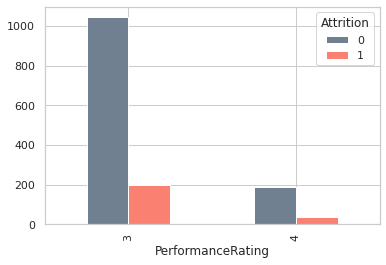

In [69]:
#Plot 

pd.crosstab(IBM.PerformanceRating, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

Performance rating has two category such as 3 and 4. 84.6% of employees are in the performance rating 3 group and 16.08 attrition. The rest of the employees are in performance rating 4 group and their attrition percentage(%16.37) is a little bit higher than previous group.

In [70]:
#let's check out RelationshipSatisfaction w.r.t Attrition

pd.crosstab(IBM.RelationshipSatisfaction, IBM.Attrition)

Attrition,0,1
RelationshipSatisfaction,,
1,219,57
2,258,45
3,388,71
4,368,64


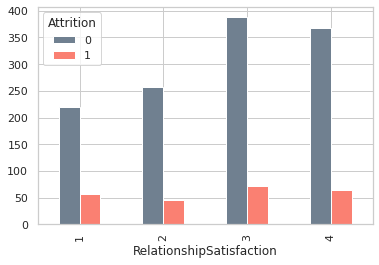

In [71]:
#Plot 

pd.crosstab(IBM.RelationshipSatisfaction, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

Relationship satisfaction is aligned with high and very high in the company. But, still High and very high relationship satisfaction level have the most attrition number respectively and compose of 52.7% all attrition in the company.

Besides that, the highest attrition percentage in the satisfaction group is low as it might be expected (20.7% of attrition in the low relationship satisfaction level.

In [72]:
#let's check out StockOptionLevel w.r.t Attrition

pd.crosstab(IBM.StockOptionLevel, IBM.Attrition)

Attrition,0,1
StockOptionLevel,,
0,477,154
1,540,56
2,146,12
3,70,15


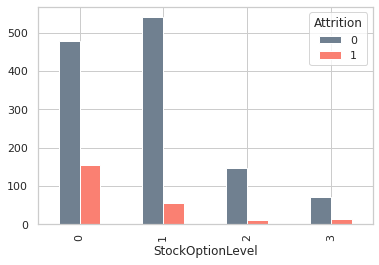

In [73]:
#Plot 

pd.crosstab(IBM.StockOptionLevel, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

If stock option level is 0, there occurs a huge attrition in the company and it composes the 65% of the all attrition in the company. Besides, as the stock option level increase, there is a decrease in attrition number.

In [74]:
#let's check out WorkLifeBalance w.r.t Attrition

pd.crosstab(IBM.WorkLifeBalance, IBM.Attrition)

Attrition,0,1
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


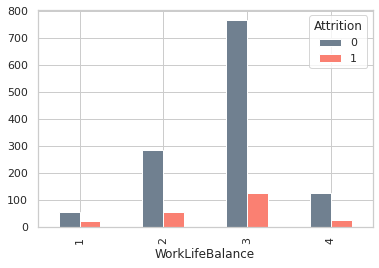

In [75]:
#Plot 

pd.crosstab(IBM.WorkLifeBalance, IBM.Attrition).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation :**

In general, work life balance is satisfactorily good throughout the company. But we have the highest attrition number and percentage throughout the company.

Besides, bad work life balance group has highest attrition percentage in its individual group.

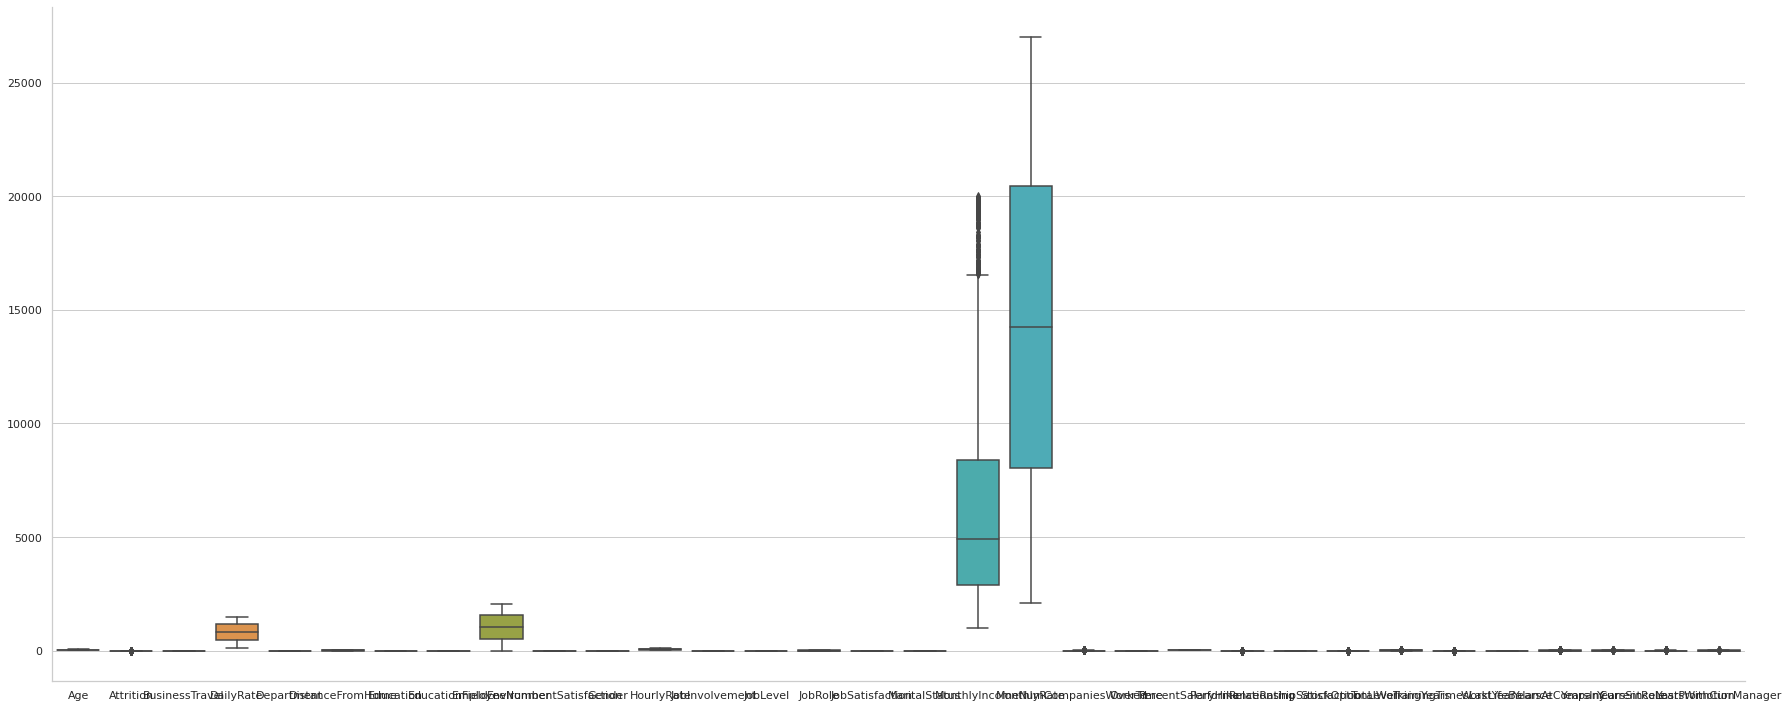

In [76]:
sns.factorplot(data=IBM,kind='box',size=10,aspect=2.5)

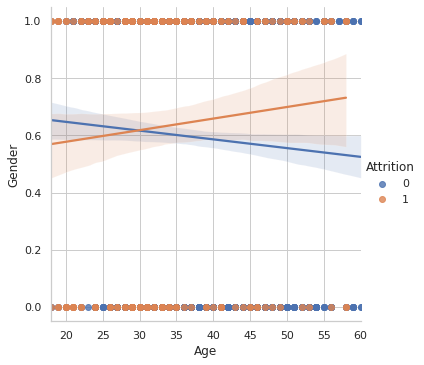

In [77]:
#Let's now find a relation among age, Gender and Attrition columns

sns.lmplot(x = 'Age', y = 'Gender', hue = 'Attrition', data = IBM);

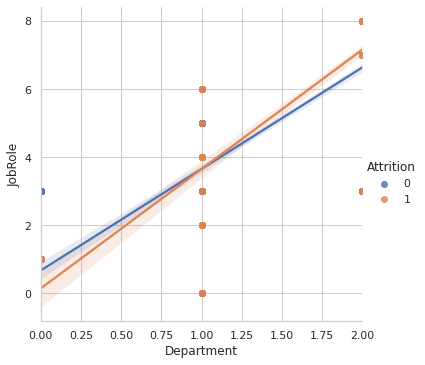

In [ ]:
#Let's now find a relation among age, Gender and Attrition columns

sns.lmplot(x = 'Department', y = 'JobRole', hue = 'Attrition', data = IBM);

**Observation :**

From the graph , we see a strong relation between JobRole and Department 

**Checking Correlation between Variables**

In [78]:
cor = IBM.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


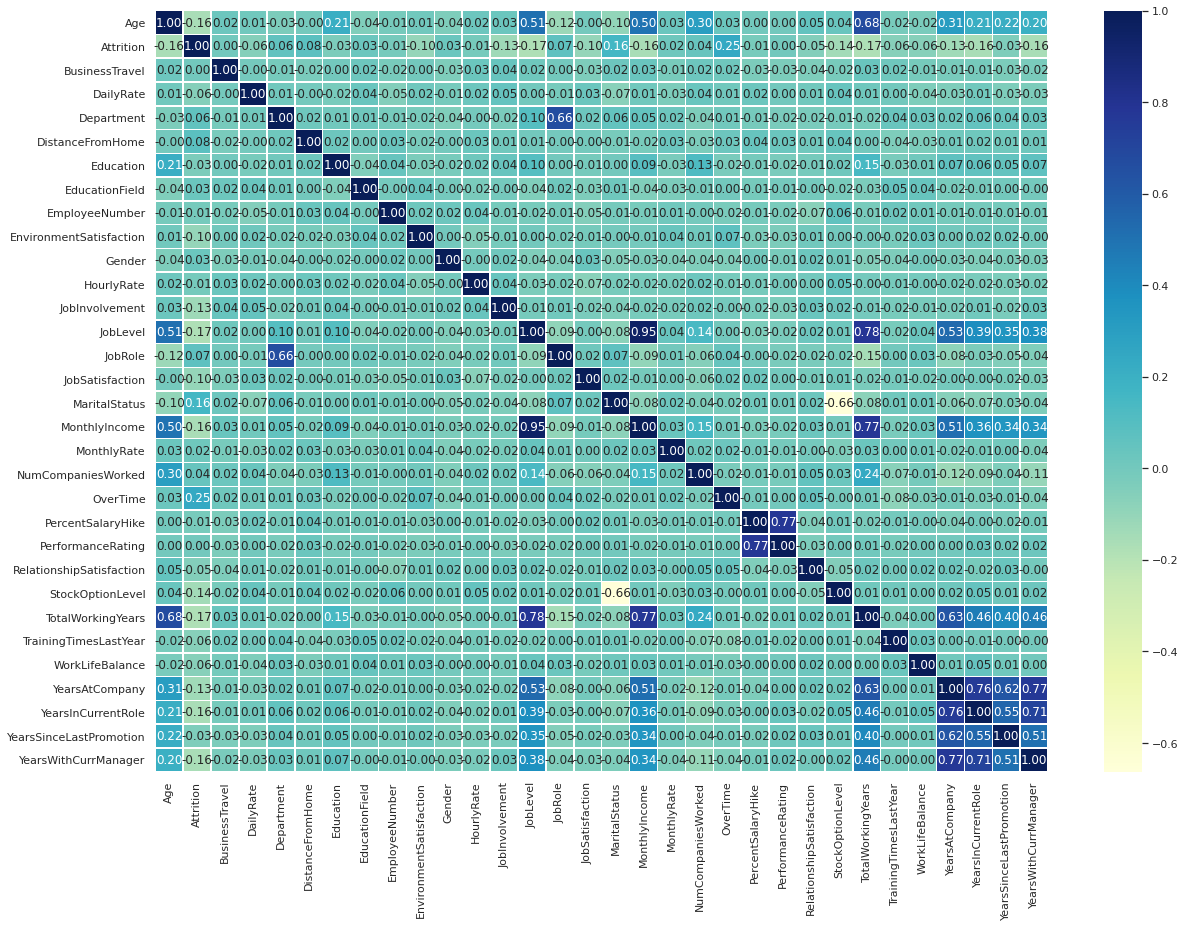

In [79]:
correlation_matrix = IBM.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**Observation :**

**Features which have strong correlations:**

Percent Salary Hike and Performance Rating,
Total Working Years, Monthly Income and Job Level,
Years at Company, Years with Current Manager, and Years in Current Role,

**Features which have moderate correlations:**

Age has moderate correlation with Total Working Years, Monthly Income, and Job Level,
Job Level has moderate correlation with Years at Company and Age,
Total Working Years has moderate correlation with Years with Current Manager, Years Since Last Promotion, Years in Current Role, Years at Company, and Age,
Years at Company has moderate correlation with Years Since Last Promotion, Total Working Years, Monthly Income, Job Level,
Years in Current Role has moderate correlation with Years Since Last Promotion, Total Working Years,
Years Since Last Promotion has moderate correlation with Years with Current Manager, Years in Current Role, Years at Company, Total Working Years,
Years with Current Manager has moderate correlation with Years Since Last Promotion, Total Working Years.

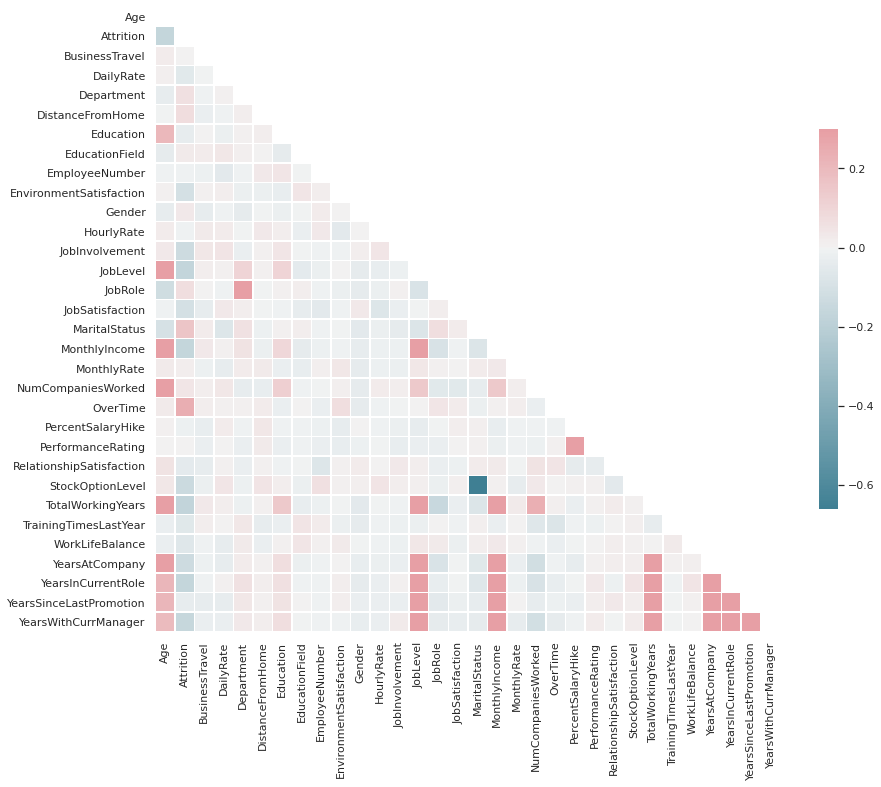

In [80]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Generally, for the training model, we don't select features that have a strong correlation because it will have multicollinearity problem. Heatmap is a good way to detect this kind of situation. In this case, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearWithCurrManager have strong correlations with each other which we should keep in our mind in further steps. Besides, that does not mean that is always case. We should try each variable and select the features which will give the best results in the model.

# **Data Cleaning**

**1.Checking Null Values**

In [81]:
IBM.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

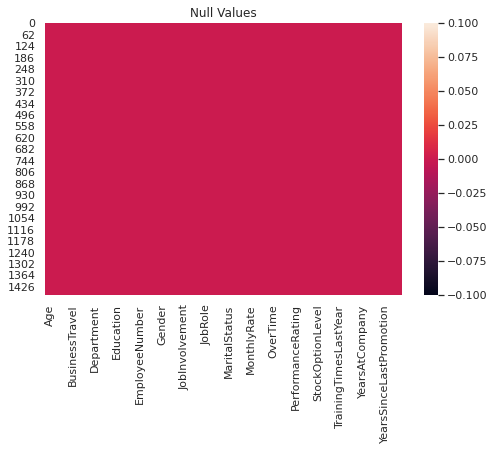

In [82]:
#Plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(IBM.isnull())
plt.title("Null Values")
plt.show()

**2.Checking for Outliers**

In [83]:
#Compute Outliers using zscore method

from scipy.stats import zscore

z=np.abs(zscore(IBM))

new_IBM=IBM [(z<3).all(axis=1)]

In [ ]:
IBM.shape

(1470, 32)

In [84]:
new_IBM.shape

(1387, 32)

In [85]:
((1470-1387)/1470)*100

5.646258503401361

**Observation :** There will be a loss of 5.64% of data from the dataset which is very much affordable .

In [86]:
new_IBM.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

**Observation :** There is skewness in most of the columns in the Dataset . Hence ,it should be removed .

In [87]:
#Using PowerTransformer to reduce skewness in data

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
for i in new_IBM.skew().index[1:]:
    if new_IBM.skew().loc[i]>0.55:
        new_IBM[i]=pt.fit_transform(new_IBM[i].values.reshape(-1,1))
    if new_IBM.skew().loc[i]<-0.55:
        new_IBM[i]=pt.fit_transform(new_IBM[i].values.reshape(-1,1))
    else:
        new_IBM[i]=new_IBM[i]

**Split Data and Target**

In [112]:
#Transfer the Attrition column to last column of the Dataset .

response = IBM['Attrition']
IBM = IBM.drop(labels=['Attrition'], axis=1)
IBM.insert(31,'Attrition',response)
IBM.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,0,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,1,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,3,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,0,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [113]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Attrition, we will drop the ‘Attrition’ column.
from sklearn.model_selection import train_test_split

X = IBM.iloc[:, :-1].values 
y = IBM.iloc[:, 31].values

In [114]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [115]:
X

array([[  41,    2, 1102, ...,    4,    0,    5],
       [  49,    1,  279, ...,    7,    1,    7],
       [  37,    2, 1373, ...,    0,    0,    0],
       ...,
       [  27,    2,  155, ...,    2,    0,    3],
       [  49,    1, 1023, ...,    6,    0,    8],
       [  34,    2,  628, ...,    3,    1,    2]])

**Preparation of Test and Train Data**:


The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [116]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=maxRS)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

**Scalling**

Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:

In [117]:
from sklearn.preprocessing import StandardScaler  # Import StandartScaler class

# Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Treating Class Imbalance**

We have a imbalanced dataset with majority of observations being of one type ('No' which is '0' in the dataset) in our case. We have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset. To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. We have two approaches to curb such datasets: oversampling, which increase the number of observations corresponding to the minority class, or undersampling which decrease the number of observations for the majority class. Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

In [118]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)
X_train_sm,  y_train_sm = sm.fit_sample(X_train, y_train)

In [119]:
X_train_sm.shape

(1976, 31)

In [120]:
y_train_sm.shape

(1976,)

**Finding Best Random State**

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

maxScore = 0
maxRS = 0

for i in range(1,1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    DT = DecisionTreeClassifier()
    DT.fit(X_train,y_train)
    pred=DT.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('best Accuracy_Score:',maxScore*100,'with random_state:',maxRS)

best Accuracy_Score: 83.21995464852607 with random_state: 495


**We can see that the best random State is 495 with an 83.21% accuracy_score.**

# **Modeling**

In [123]:
# Ensemble Techniques...

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.naive_bayes import GaussianNB

# Model selection libraries...

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [124]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**1.Decision_Tree_Classifier**

In [125]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
#Predicting and estimating the result

y_pred_dt = DT.predict(X_test)
print("Decision Tree Classifier Report: \n\n", DecisionTreeClassifier(y_test, y_pred_dt))
print("Accuracy on Training Set: {}%".format(round(DT.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(DT.score(X_test, y_test)*100, 2)))

Decision Tree Classifier Report: 

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                       criterion=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0,...
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 

Feature Importance of Decision_Tree_Classifier
________________________

In [127]:
print("Feature importances/;\n{}".format(DT.feature_importances_))

Feature importances/;
[0.07196638 0.01375203 0.07532275 0.         0.06033073 0.00618687
 0.01997952 0.05193298 0.0117822  0.00541351 0.05110692 0.01982193
 0.00721801 0.05638638 0.02314651 0.         0.07554659 0.06030959
 0.04734208 0.04577372 0.01253853 0.00280701 0.03016629 0.02800305
 0.08211897 0.05415815 0.01765479 0.01514133 0.         0.0408594
 0.01323377]


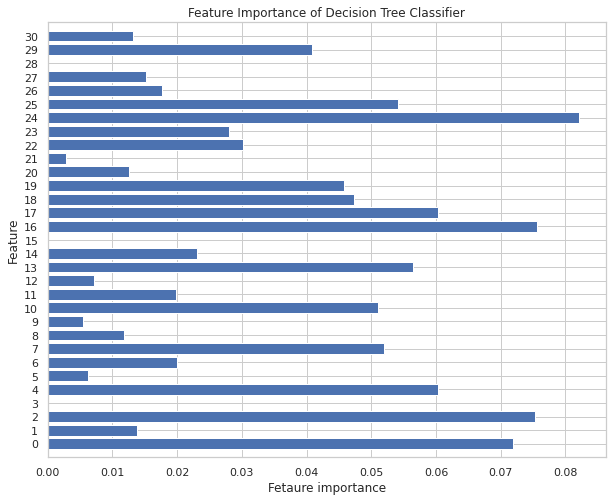

In [128]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features),DT.feature_importances_,align='center')
plt.yticks(np.arange(n_features),)
plt.title("Feature Importance of Decision Tree Classifier")
plt.xlabel("Fetaure importance")
plt.ylabel("Feature")
plt.ylim(-1,n_features)
plt.show()

**Observation :**

Here we see that the feature used in the top split ("JobSatisfication") is by far the most Important Feature .

Confusion_Matrix for Decision_Tree_Classifier
_____________________________________________

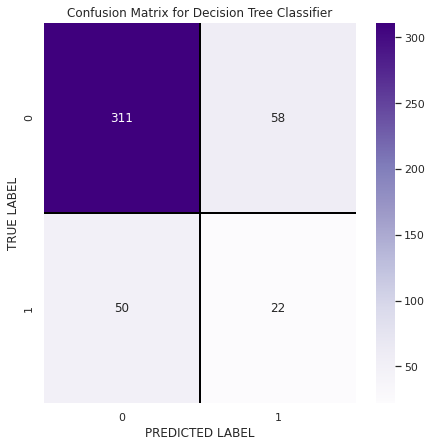

In [129]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Plotting ROC_AUC Curve for Decision_Tree_Classifier
_______

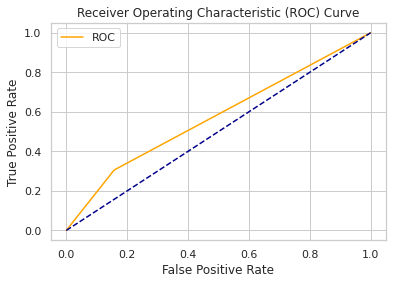

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plot_roc_curve(fpr, tpr)

**2. Random Forest Classifier** 

In [131]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
#Predicting and estimating the result

y_pred_rf = RF.predict(X_test)
print("RandomForestClassifier Report: \n\n", RandomForestClassifier(y_test, y_pred_rf))
print("Accuracy on Training Set: {}%".format(round(RF.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(RF.score(X_test, y_test)*100, 2)))

RandomForestClassifier Report: 

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 

Feature Importance of Random_Forest_Classifier
_________________

In [133]:
print("Feature importances/;\n{}".format(RF.feature_importances_))

Feature importances/;
[0.06770865 0.01136139 0.05211817 0.0104779  0.04436749 0.01935833
 0.02419032 0.04522505 0.03005083 0.00896086 0.05005202 0.0280733
 0.0211812  0.02847396 0.0282007  0.01952829 0.07356627 0.04313915
 0.03008201 0.04739759 0.03591109 0.00396248 0.02379608 0.02499899
 0.05540226 0.02359915 0.02651814 0.03396103 0.02483191 0.02766333
 0.03584204]


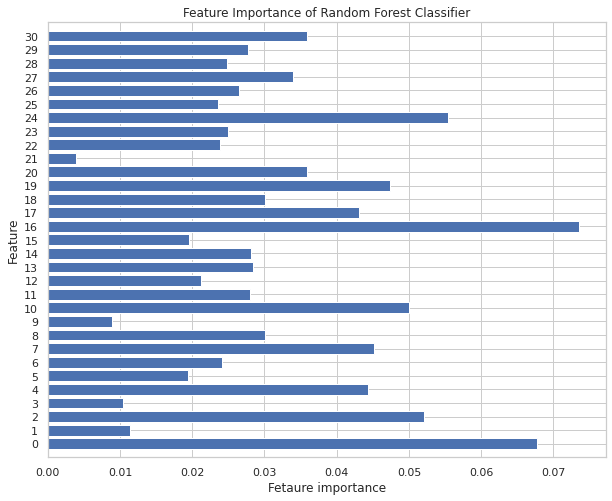

In [134]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features),RF.feature_importances_,align='center')
plt.yticks(np.arange(n_features),)
plt.title("Feature Importance of Random Forest Classifier")
plt.xlabel("Fetaure importance")
plt.ylabel("Feature")
plt.ylim(-1,n_features)
plt.show()

**Observation :**

Here we see that the feature used in the top split ("JobSatisfication") is by far the most Important Feature .

Confusion Matrix for Random Forest Classifier
_________________

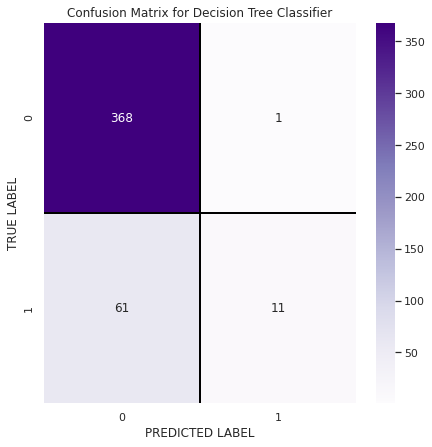

In [135]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Plotting ROC_AUC curve for Random Forest Classifier
_________________

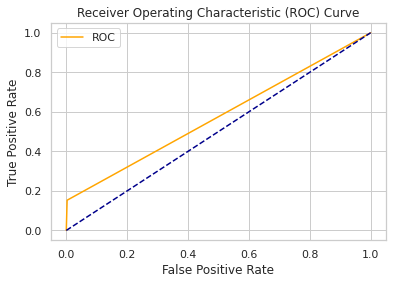

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plot_roc_curve(fpr, tpr)

**3. Gradient Boosting Classifier**

In [137]:
GBR = GradientBoostingClassifier()
GBR.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [138]:
#Predicting and estimating the result

y_pred_gb = GBR.predict(X_test)
print("Gradient Boosting Classifier Report: \n\n", GradientBoostingClassifier(y_test, y_pred_gb))
print("Accuracy on Training Set: {}%".format(round(GBR.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(GBR.score(X_test, y_test)*100, 2)))

Gradient Boosting Classifier Report: 

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0...
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1]),
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n

Feature Importance of Gradient Boosting Classifier 
________________________

In [139]:
print("Feature importances/;\n{}".format(GBR.feature_importances_))

Feature importances/;
[0.09506426 0.00962774 0.05940049 0.         0.04177968 0.00642569
 0.01379916 0.04614594 0.05054043 0.00071852 0.02504861 0.02405222
 0.02507479 0.04889274 0.0355279  0.00337207 0.09694463 0.02598522
 0.03793813 0.10169618 0.00567132 0.00053965 0.01987241 0.03716234
 0.05745229 0.0177518  0.02869102 0.00830799 0.00148556 0.03429013
 0.04074109]


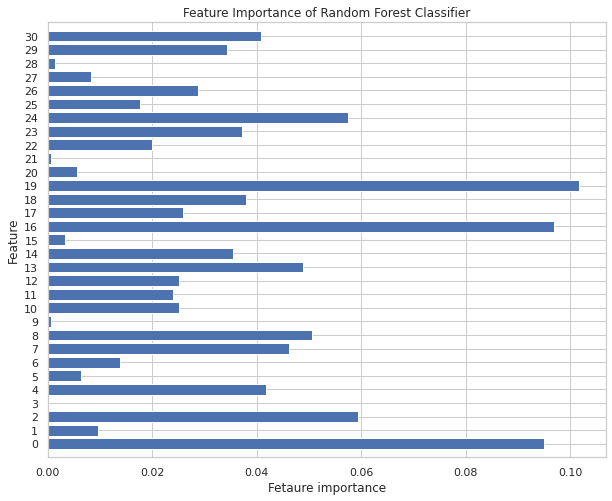

In [140]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features),GBR.feature_importances_,align='center')
plt.yticks(np.arange(n_features),)
plt.title("Feature Importance of Random Forest Classifier")
plt.xlabel("Fetaure importance")
plt.ylabel("Feature")
plt.ylim(-1,n_features)
plt.show()

**Observation :**

Here we see that the feature used in the top split ("MonthlyRate") is by far the most Important Feature .

Confusion Matrix for Gradient Boosting Classifier 
__________________

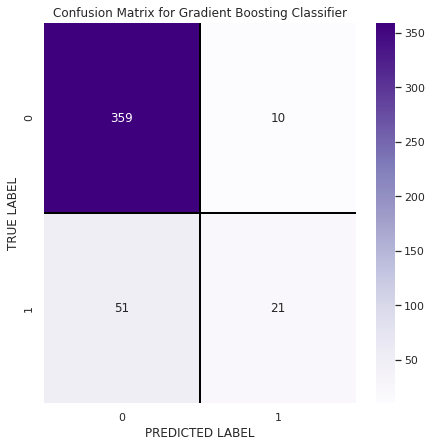

In [141]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Plotting ROC_AUC Curve for Gradient Boosting Classifier 
____________________

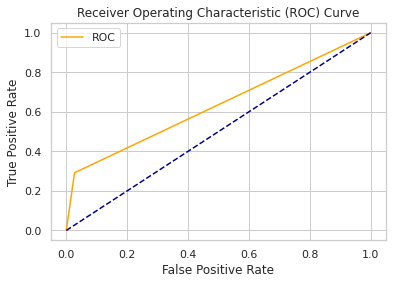

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
plot_roc_curve(fpr, tpr)

4.Logistic_Regression_Classifier
___________________

In [143]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
#Predicting and estimating the result

y_pred_lr = LR.predict(X_test)
print("Logistic Regression Report: \n\n", LogisticRegression(y_test, y_pred_lr))
print("Accuracy on Training Set: {}%".format(round(LR.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(LR.score(X_test, y_test)*100, 2)))

Logistic Regression Report: 

 LogisticRegression(C=1.0, class_weight=None,
                   dual=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Confusion Matrix for Logistic Regression
___________________________

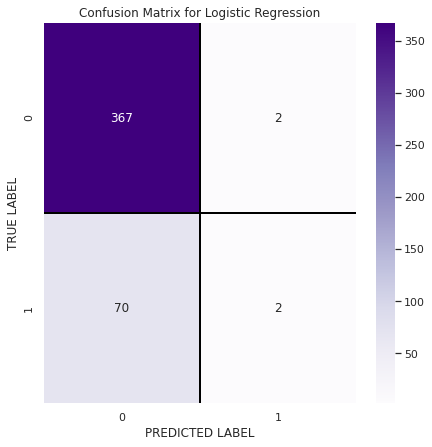

In [145]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Plotting ROC_AUC Curve for Logistic Regression
_____________________

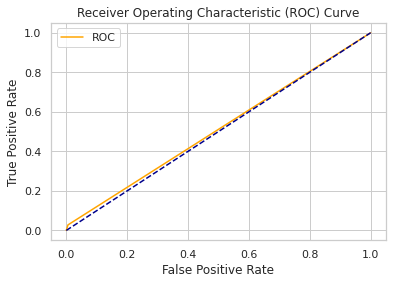

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plot_roc_curve(fpr, tpr)

**5.Support Vector Machine(SVM) Classification**

In [147]:
SV = SVC()
SV.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
#Predicting and estimating the result

y_pred_sv = SV.predict(X_test)
print("SVC Report: \n\n", SVC(y_test, y_pred_sv))
print("Accuracy on Training Set: {}%".format(round(SV.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(SV.score(X_test, y_test)*100, 2)))

SVC Report: 

 SVC(C=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Confusion_Matrix for SVC
______________________________

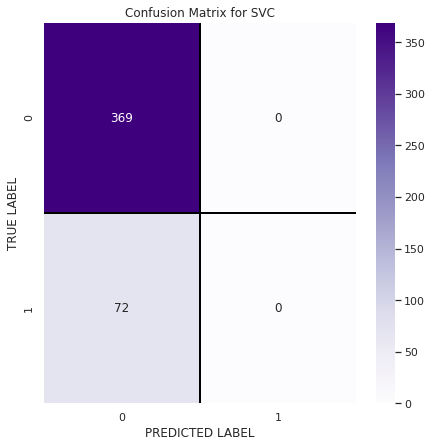

In [149]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_sv)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVC')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Plotting ROC_AUC curve for SVC
______________________

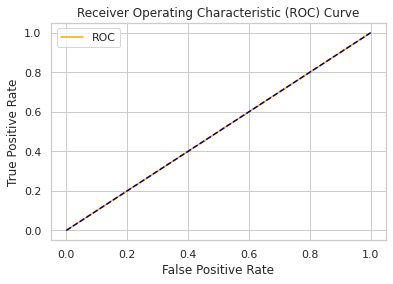

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)
plot_roc_curve(fpr, tpr)

**6.Naive Byes Classifier**

In [151]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [152]:
#Predicting and estimating the result

y_pred_nb = NB.predict(X_test)
print("SVC Report: \n\n", GaussianNB(y_test, y_pred_sv))
print("Accuracy on Training Set: {}%".format(round(NB.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(NB.score(X_test, y_test)*100, 2)))

SVC Report: 

 GaussianNB(priors=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

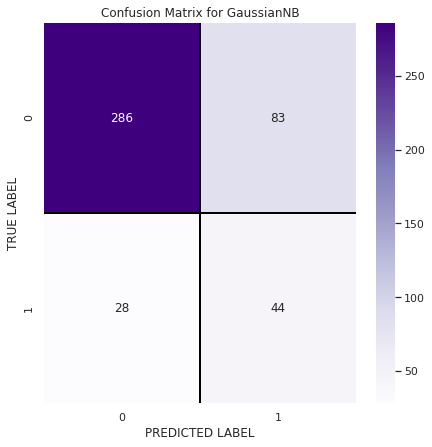

In [153]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for GaussianNB')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

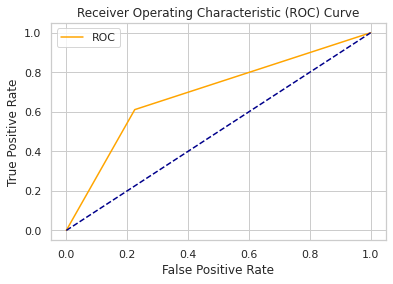

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plot_roc_curve(fpr, tpr)

**7. Ada_Boost Classifier**

In [155]:
AD = AdaBoostClassifier()
AD.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [156]:
#Predicting and estimating the result

y_pred_ad = AD.predict(X_test)
print("SVC Report: \n\n", AdaBoostClassifier(y_test, y_pred_ad))
print("Accuracy on Training Set: {}%".format(round(AD.score(X_train, y_train)*100, 2)))
print("Accuracy on Testing Set: {}%".format(round(AD.score(X_test, y_test)*100, 2)))

SVC Report: 

 AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0...
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

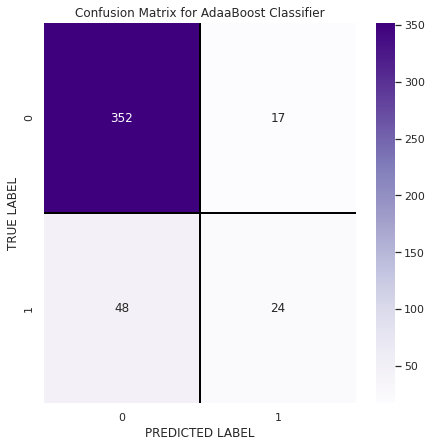

In [157]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_ad)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaaBoost Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

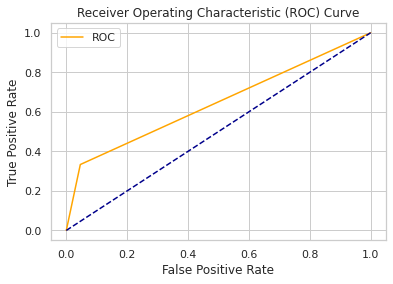

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ad)
plot_roc_curve(fpr, tpr)

# **Computing Cross Validation Score**

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
print(cross_val_score(DT,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_dt)-cross_val_score(DT,X,y,cv=5).mean())

0.7693877551020408
Difference between accuracy score and cross validatio score is -  -0.025850340136054473


In [161]:
print(cross_val_score(RF,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_rf)-cross_val_score(RF,X,y,cv=5).mean())

0.8551020408163265
Difference between accuracy score and cross validatio score is -  0.0009070294784582211


In [162]:
print(cross_val_score(GBR,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_gb)-cross_val_score(GBR,X,y,cv=5).mean())

0.8619047619047618
Difference between accuracy score and cross validatio score is -  0.0004535147392291661


In [163]:
print(cross_val_score(LR,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_lr)-cross_val_score(LR,X,y,cv=5).mean())

0.8414965986394558
Difference between accuracy score and cross validatio score is -  -0.004761904761904745


In [164]:
print(cross_val_score(SV,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_sv)-cross_val_score(SV,X,y,cv=5).mean())

0.8387755102040817
Difference between accuracy score and cross validatio score is -  -0.0020408163265306367


In [165]:
print(cross_val_score(NB,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_nb)-cross_val_score(NB,X,y,cv=5).mean())

0.7972789115646259
Difference between accuracy score and cross validatio score is -  -0.048979591836734726


In [166]:
print(cross_val_score(AD,X,y,cv=5).mean())
print("Difference between accuracy score and cross validatio score is - ",accuracy_score(y_test,y_pred_ad)-cross_val_score(AD,X,y,cv=5).mean())

0.8571428571428571
Difference between accuracy score and cross validatio score is -  -0.0045351473922902175


**Hyper Parameter Tuning**

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
parameter={"n_estimators":[5,50,250,500],
           "max_depth":[1,3,5,7,9],
           "learning_rate":[0.01,0.1,1,10,100]}

In [169]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [170]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [171]:
GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

In [172]:
Final_mod = GradientBoostingClassifier(learning_rate = 100, max_depth = 9,n_estimators=500)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,y_pred_gb)
print(acc*100)

86.16780045351474


**Our model learnt almost 86.16%**

In [175]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.8625850340136054


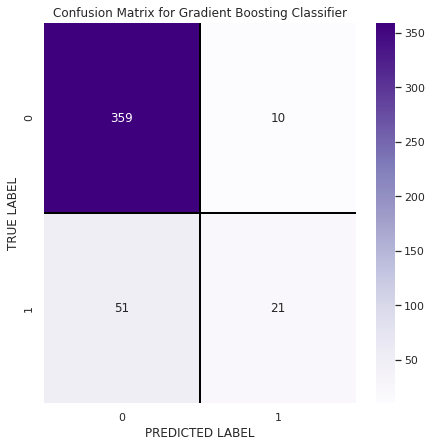

In [173]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

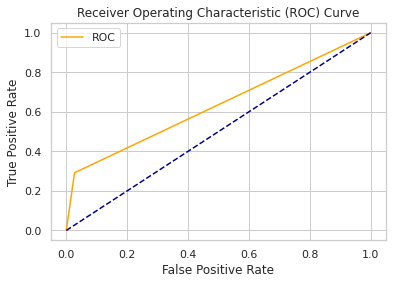

In [174]:
#Plotting ROC_AUC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
plot_roc_curve(fpr, tpr)

In [179]:
#Making Final Prediction

Prediction = pd.DataFrame([Final_mod.predict(X_test)[:],y_pred_gb[:]],index=['Predicted','Original'])
Prediction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,...,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
Predicted,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Original,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# **Saving Final Model**

In [181]:
# Saving the Predicted values in csv file

Prediction.to_csv('IBM_HR.csv')

In [182]:
# Dumping Data in pickle file.

import joblib
joblib.dump(GBR,'IBM_HR_Attrition_Rate_Analytics.pkl')

['IBM_HR_Attrition_Rate_Analytics.pkl']